<center><img src="https://buzzrx.s3.amazonaws.com/c5ad2bc4-5c2a-4b92-a42c-b8ad1c83a0f6/Untitled-1.png" width="500" height="300"></center>

<a class="anchor" id="0.1"></a>
# **Table of Contents** 

1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Conclusion](#7)
8. [References](8)

# **Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

El modelado de series de tiempo es una herramienta poderosa que se utiliza en diversas industrias para predecir y pronosticar variables temporales. En el ámbito farmacéutico a pequeña escala, donde las ventas de medicamentos y productos relacionados son de gran importancia, el uso de técnicas de modelado de series temporales puede proporcionar información valiosa para la planificación y gestión de inventarios, así como para la toma de decisiones estratégicas.

La previsión precisa de las ventas farmacéuticas a pequeña escala es fundamental para garantizar un suministro adecuado de medicamentos y minimizar los costos asociados con el exceso o la falta de existencias. Además, los factores estacionales y las tendencias específicas de la industria farmacéutica pueden afectar significativamente las ventas, lo que hace que el modelado de series temporales sea una herramienta especialmente relevante en este contexto.

Aplicando técnicas de modelado de series temporales, se pueden identificar patrones y comportamientos históricos en las ventas farmacéuticas. Estos patrones pueden incluir estacionalidad mensual o estacionalidad relacionada con eventos específicos, como temporadas de gripe, cambios estacionales en la demanda de ciertos productos o días festivos relacionados con el consumo de medicamentos.

Además de la estacionalidad, las series temporales pueden revelar tendencias a largo plazo, cambios en la demanda debido a factores externos como regulaciones gubernamentales o avances médicos, así como patrones de variación aleatoria que pueden ser difíciles de capturar con otros enfoques de pronóstico.

En este sentido, el objetivo de este estudio es aplicar técnicas de modelación de series temporales para predecir las ventas de productos farmacéuticos a pequeña escala. Aprovechando los datos históricos de ventas y utilizando métodos como el suavizado exponencial, modelos ARIMA (Promedio Móvil Integrado Autoregresivo) u otros enfoques más sofisticados, buscamos obtener pronósticos precisos y confiables que ayuden a optimizar la gestión de inventarios y la toma de decisiones estratégicas en las pequeñas y medianas empresas. escalar la industria farmacéutica.

El resultado de este estudio tiene el potencial de beneficiar a las empresas farmacéuticas proporcionándoles una base sólida para planificar y gestionar sus operaciones de manera más eficiente. Al anticipar las demandas futuras y adaptarse rápidamente a los cambios del mercado, estas empresas pueden optimizar sus recursos y maximizar su rentabilidad, al tiempo que garantizan un suministro adecuado de medicamentos para satisfacer las necesidades de sus clientes y pacientes.

# **Case study** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

En este mini estudio de caso, nos centraremos en pronosticar la demanda de un medicamento específico en la industria farmacéutica. La idea principal es utilizar modelos de pronóstico de series temporales para predecir la demanda futura de ese medicamento. Al hacerlo, permitiremos a la compañía farmacéutica tomar decisiones informadas sobre la producción, el inventario y la distribución de medicamentos, optimizando así su cadena de suministro y satisfaciendo las necesidades de los pacientes de manera eficiente.

El principal objetivo de este estudio de caso es pronosticar la demanda de un medicamento específico basándose en datos históricos disponibles de 2014 a 2019, diariamente. Utilizaremos modelos de series de tiempo para predecir la demanda futura del medicamento, lo que permitirá a la empresa farmacéutica planificar adecuadamente la producción y la gestión de inventario.

Utilizaremos diferentes técnicas de análisis y previsión:

1. Recopilación de datos.
2. Análisis de datos exploratorios.
3. Preparación de datos.
4. Selección de modelo.
5. Ajuste y evaluación del modelo.
6. Previsión de la demanda de un fármaco.

En este caso de estudio, la empresa farmacéutica tendrá un modelo preciso de previsión de la demanda del medicamento en cuestión. Esto les permitirá tomar decisiones informadas sobre producción, inventario y estrategias de marketing. Además, el uso de modelos de series temporales les dará una ventaja competitiva al anticipar las fluctuaciones de la demanda y adaptarse rápidamente a los cambios en el mercado farmacéutico.

## **Load Library**

In [1]:
# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd
import math

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series
from utilsforecast.preprocessing import fill_gaps

In [2]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

## **Load data**

Información sobre nuestros datos:

El conjunto de datos estuvo compuesto por 6 años (período 2014-2019). Como resultado de las entrevistas con los farmacéuticos se decidió que el tema de los análisis y pronósticos serían las categorías de medicamentos reales, en lugar de los medicamentos individuales. Por tanto, el grupo de fármacos seleccionado (57 fármacos) se clasifica en 8 categorías del Sistema de Clasificación Química Terapéutica Anatómica (ATC):

* M01AB - Volumen de ventas de productos antiinflamatorios y antirreumáticos, no esteroides, derivados del ácido acético y afines.
* M01AE - Volumen de ventas de productos antiinflamatorios y antirreumáticos, no esteroides, derivados del ácido propiónico.
* N02BA - Volumen de ventas de otros analgésicos y antipiréticos, Ácido salicílico y derivados,
* N02BE/B - Volumen de ventas de otros analgésicos y antipiréticos, Pirazolonas y Anilidas.
* N05B - Volumen de ventas de psicolépticos, ansiolíticos.
* N05C - Volumen de ventas de psicolépticos, hipnóticos y sedantes
* R03 - Volumen de ventas de medicamentos para enfermedades obstructivas de las vías respiratorias
* R06 - Volumen de ventas de antihistamínicos para uso sistémico



In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/pharma_sales_daily.csv", parse_dates=["datum"])#.loc[:, ['datum', 'M01AB']]
df

datum  M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  \
0    2014-01-02   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014   
1    2014-01-03   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014   
2    2014-01-04   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014   
3    2014-01-05   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014   
4    2014-01-06   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014   
...         ...    ...     ...    ...    ...   ...   ...   ...   ...   ...   
2101 2019-10-04   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019   
2102 2019-10-05   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019   
2103 2019-10-06   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019   
2104 2019-10-07   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019   
2105 2019-10-08   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019   

      Month  Hour Weekday Name  
0         1   248     Thursday  
1         1   276       Friday  
2         1   276     Saturday  
3         1   276       Sunday  
4         1   276       Monday  
...     ...   ...          ...  
2101     10   276       Friday  
2102     10   276     Saturday  
2103     10   276       Sunday  
2104     10   276       Monday  
2105     10   190      Tuesday  

[2106 rows x 13 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datum         2106 non-null   datetime64[ns]
 1   M01AB         2106 non-null   float64       
 2   M01AE         2106 non-null   float64       
 3   N02BA         2106 non-null   float64       
 4   N02BE         2106 non-null   float64       
 5   N05B          2106 non-null   float64       
 6   N05C          2106 non-null   float64       
 7   R03           2106 non-null   float64       
 8   R06           2106 non-null   float64       
 9   Year          2106 non-null   int64         
 10  Month         2106 non-null   int64         
 11  Hour          2106 non-null   int64         
 12  Weekday Name  2106 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 214.0+ KB


In [5]:
# Renombrar las variables
df["unique_id"]="1"
df=df.rename(columns={"datum": "ds", "M01AB": "y"})
df.head()

ds    y  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0 2014-01-02  0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1 2014-01-03  8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2 2014-01-04  2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3 2014-01-05  4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4 2014-01-06  5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name unique_id  
0   248     Thursday         1  
1   276       Friday         1  
2   276     Saturday         1  
3   276       Sunday         1  
4   276       Monday         1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            2106 non-null   datetime64[ns]
 1   y             2106 non-null   float64       
 2   M01AE         2106 non-null   float64       
 3   N02BA         2106 non-null   float64       
 4   N02BE         2106 non-null   float64       
 5   N05B          2106 non-null   float64       
 6   N05C          2106 non-null   float64       
 7   R03           2106 non-null   float64       
 8   R06           2106 non-null   float64       
 9   Year          2106 non-null   int64         
 10  Month         2106 non-null   int64         
 11  Hour          2106 non-null   int64         
 12  Weekday Name  2106 non-null   object        
 13  unique_id     2106 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(2)
memory usage: 230.5+ KB


# **Explora datos con el método grafico** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

La visualización gráfica de series temporales puede ser una estrategia eficaz para detectar tendencias, patrones y estacionalidades. Este enfoque, a su vez, facilita la identificación de posibles rezagos que podrían usarse como predictores en el modelo.

Usaremos el método `plot` de `Statsforecast` para visualizar nuestros datos. Este método imprime 8 series aleatorias del conjunto de datos y es útil para EDA básica.

Así lucen nuestros datos, después de haber realizado un par de maniobras sobre nuestros datos.

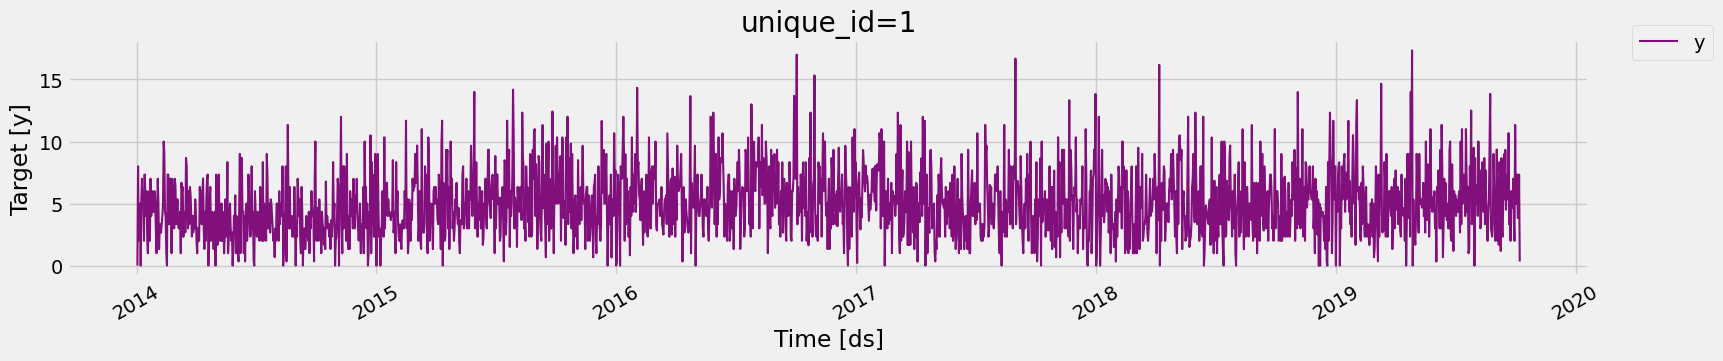

In [7]:
plot_series(df)

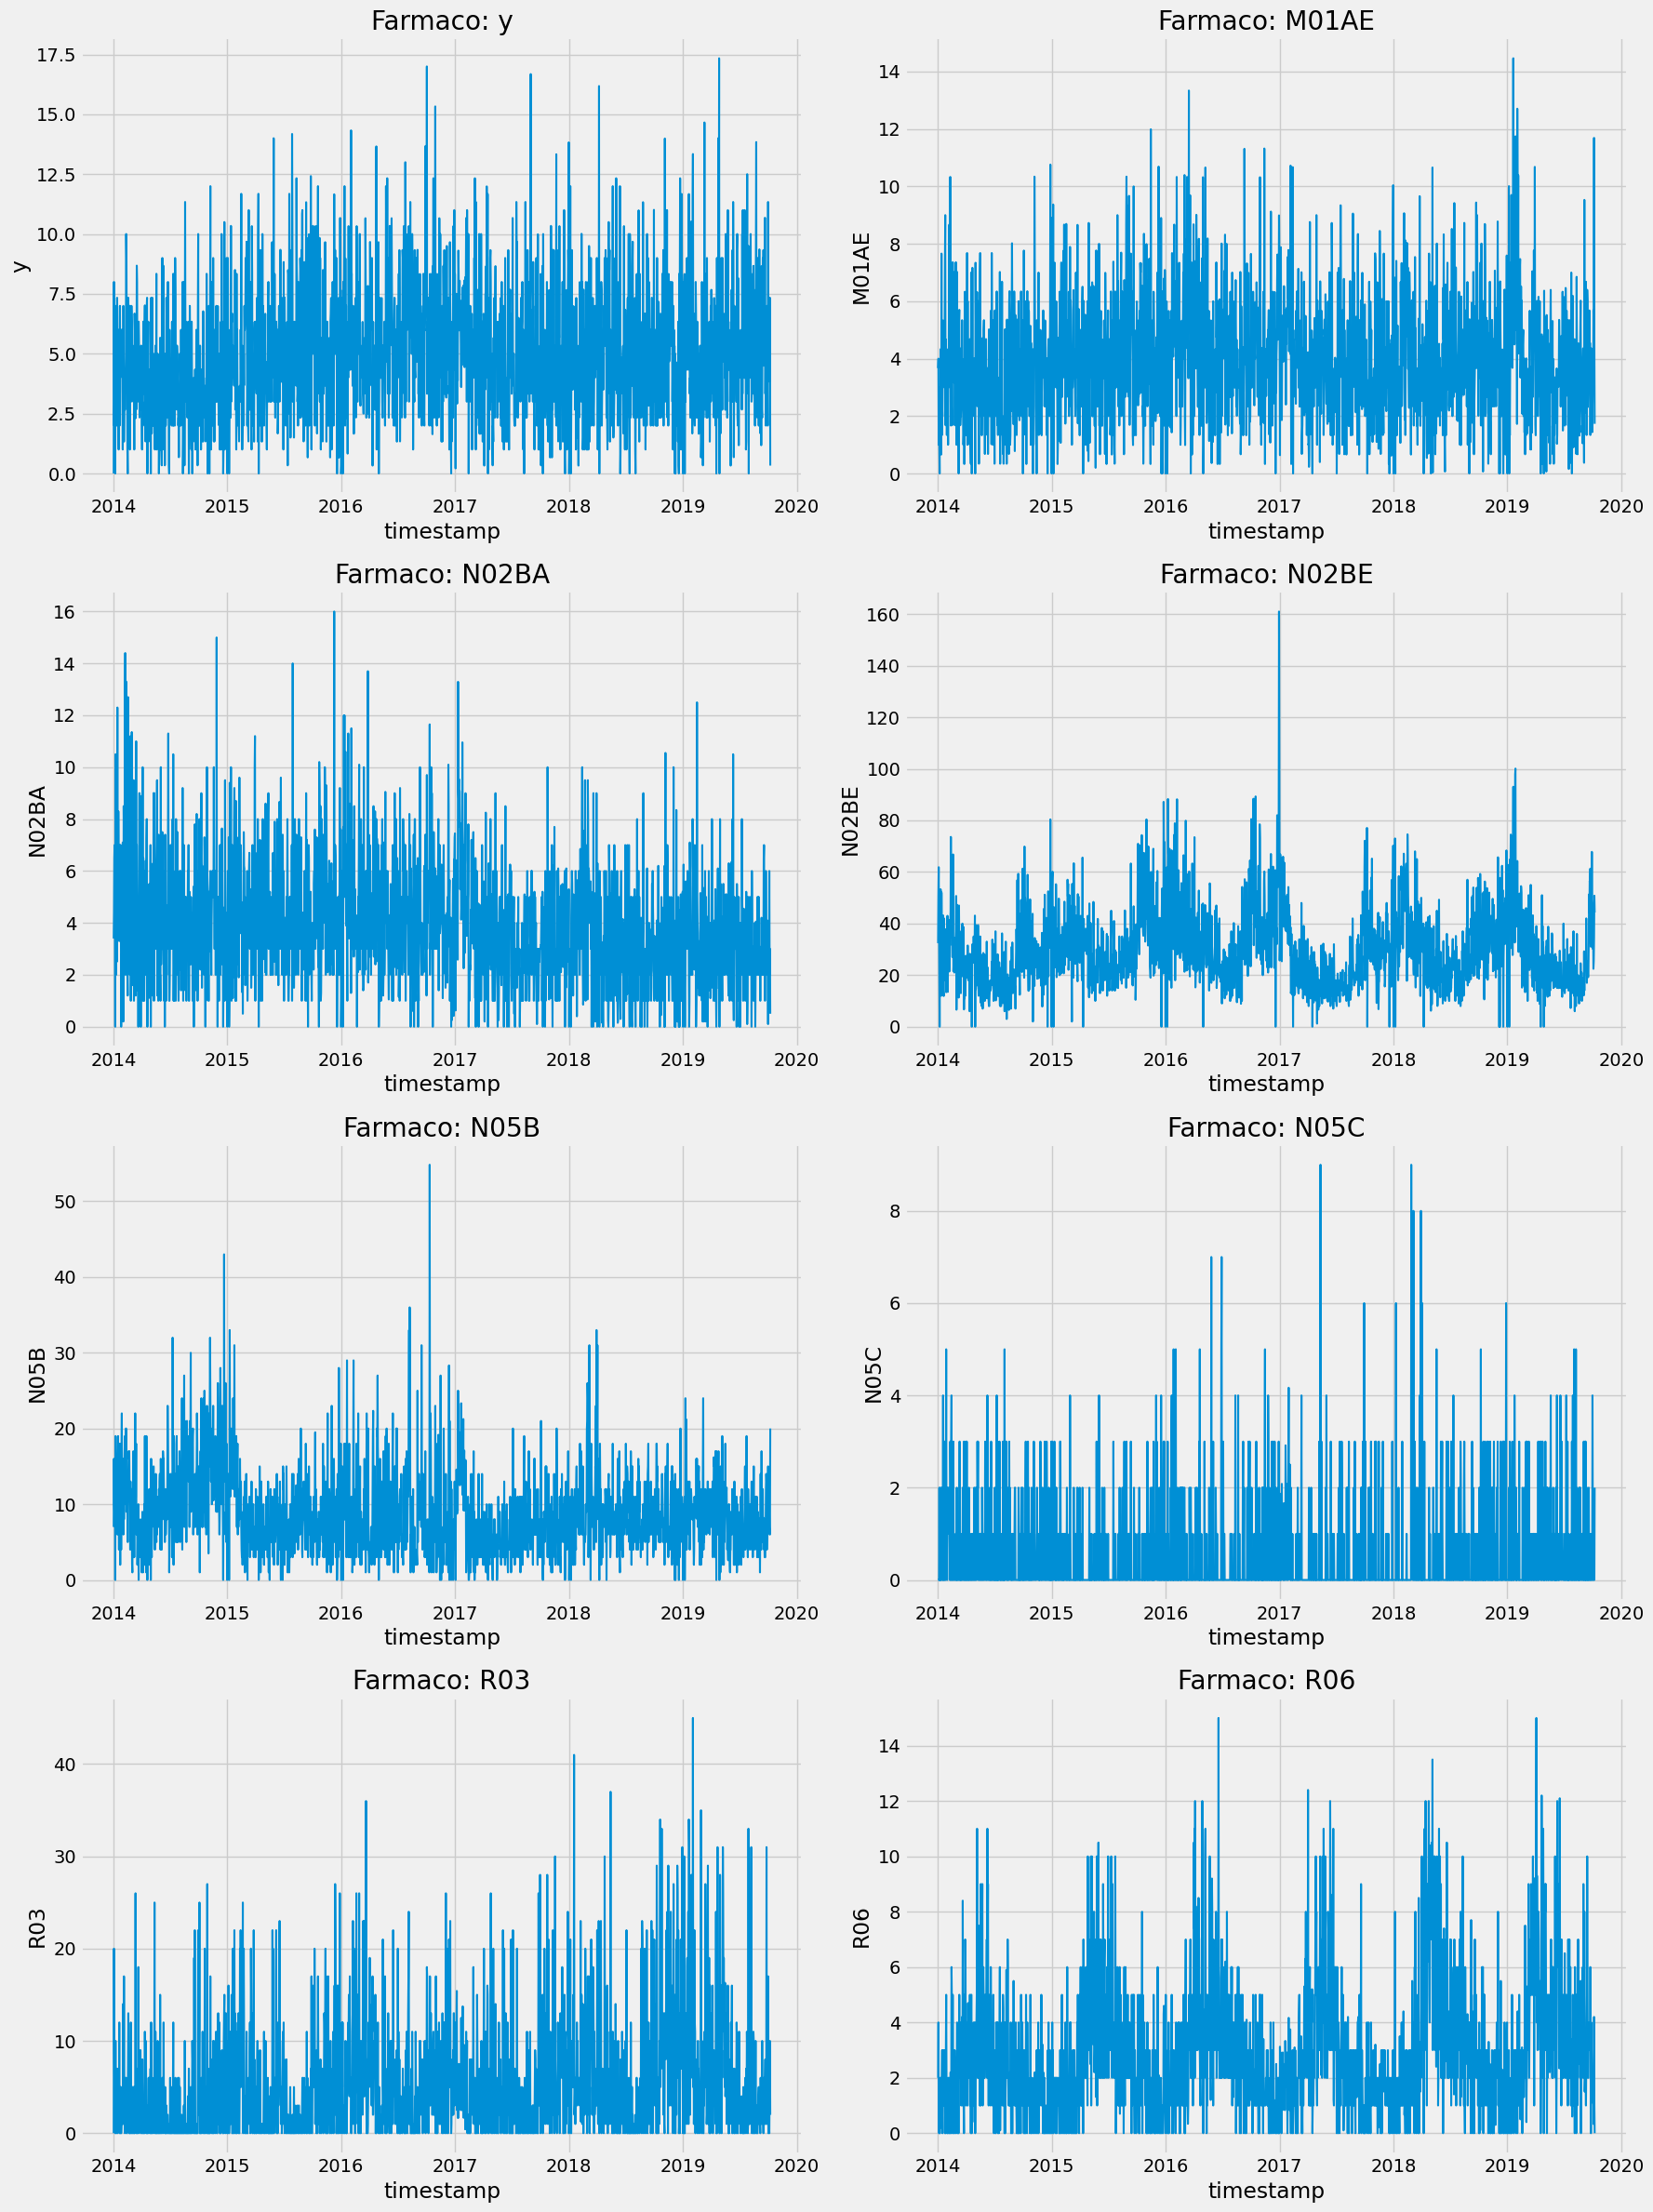

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el DataFrame 'farma' con los datos proporcionados
farma = df[['ds', 'y', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]

# Verificar si la columna 'ds' existe en el DataFrame
if 'ds' in farma.columns:
    # Extraer los nombres de las columnas
    columns = farma.columns.tolist()
    # Excluir la columna 'ds' de la lista
    columns.remove('ds')
    
    # Configurar el tamaño de la figura y el número de subplots
    num_plots = len(columns)
    num_cols = 2
    num_rows = (num_plots + 1) // num_cols  # Calcular el número de filas necesarias
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))
    axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar el acceso
    
    # Graficar cada columna contra 'ds' en subplots
    for i, col in enumerate(columns):
        sns.lineplot(x=farma['ds'], y=farma[col], data=farma, ax=axs[i])
        axs[i].set_title(f'Farmaco: {col}')
        axs[i].set_xlabel('timestamp')
        axs[i].set_ylabel(col)
        axs[i].grid(True)
    
    # Eliminar subplots vacíos si hay
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()
else:
    print("The 'timestamp' column does not exist in the DataFrame.")


In [9]:
df_m01ab = df[['y','Year','Month']]

In [10]:
df_m01ab = df_m01ab.groupby(['Year', 'Month']).sum().reset_index()
df_m01ab

Year  Month       y
0   2014      1  127.69
1   2014      2  133.32
2   2014      3  137.44
3   2014      4  113.10
4   2014      5  101.79
..   ...    ...     ...
65  2019      6  151.54
66  2019      7  181.00
67  2019      8  181.91
68  2019      9  161.07
69  2019     10   44.37

[70 rows x 3 columns]

In [11]:
# Plot the 'M01AB' values against month and year
fig = px.bar(df_m01ab, x='Month', y='y', color='Year', barmode='group')

# Update the axis labels and title
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='M01AB',
    title='M01AB vs Month and Year'
)

# Show the plot
fig.show()

In [12]:
# Convert Year and Month columns to datetime format
df_m01ab['Date'] = pd.to_datetime(df_m01ab[['Year', 'Month']].assign(day=1))

# Plot M01AB vs date
fig = px.line(df_m01ab, x='Date', y='y', title='M01AB vs Date')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='M01AB')

# Show the plot
fig.show()

In [13]:
# Calculate the total yearly consumption of M01AB
df_m01ab_yearly = df_m01ab.groupby('Year')['y'].sum().reset_index()

# Create the bar chart
fig = px.bar(df_m01ab_yearly, x='Year', y='y', color='Year')

# Customize the layout
fig.update_layout(
    title='Total Yearly Consumption of M01AB',
    xaxis_title='Year',
    yaxis_title='Consumption',
    showlegend=False
)

# Show the chart
fig.show()

## **Plot Seasonality**

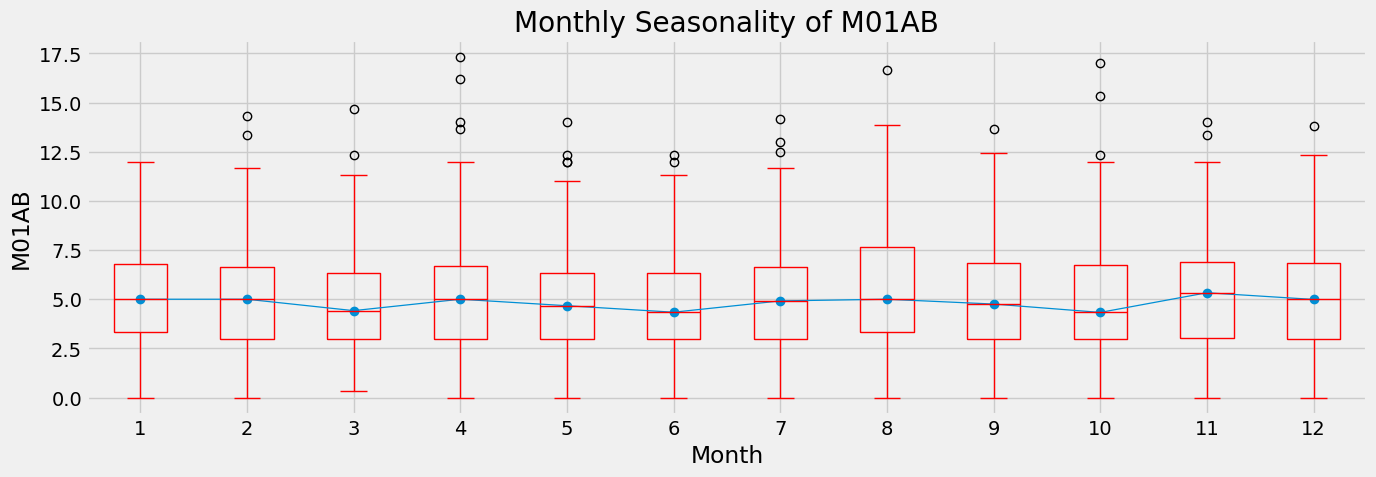

In [14]:
# Boxplot graph for monthly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
#df1['month'] = df1['ds'].apply(lambda x: x.month)
df.boxplot(column="y", by='Month', ax=ax, color="red")
df.groupby('Month')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('M01AB')
ax.set_title('Monthly Seasonality of M01AB')
fig.suptitle('');
#plt.savefig("Gráfico de Barra-mes")

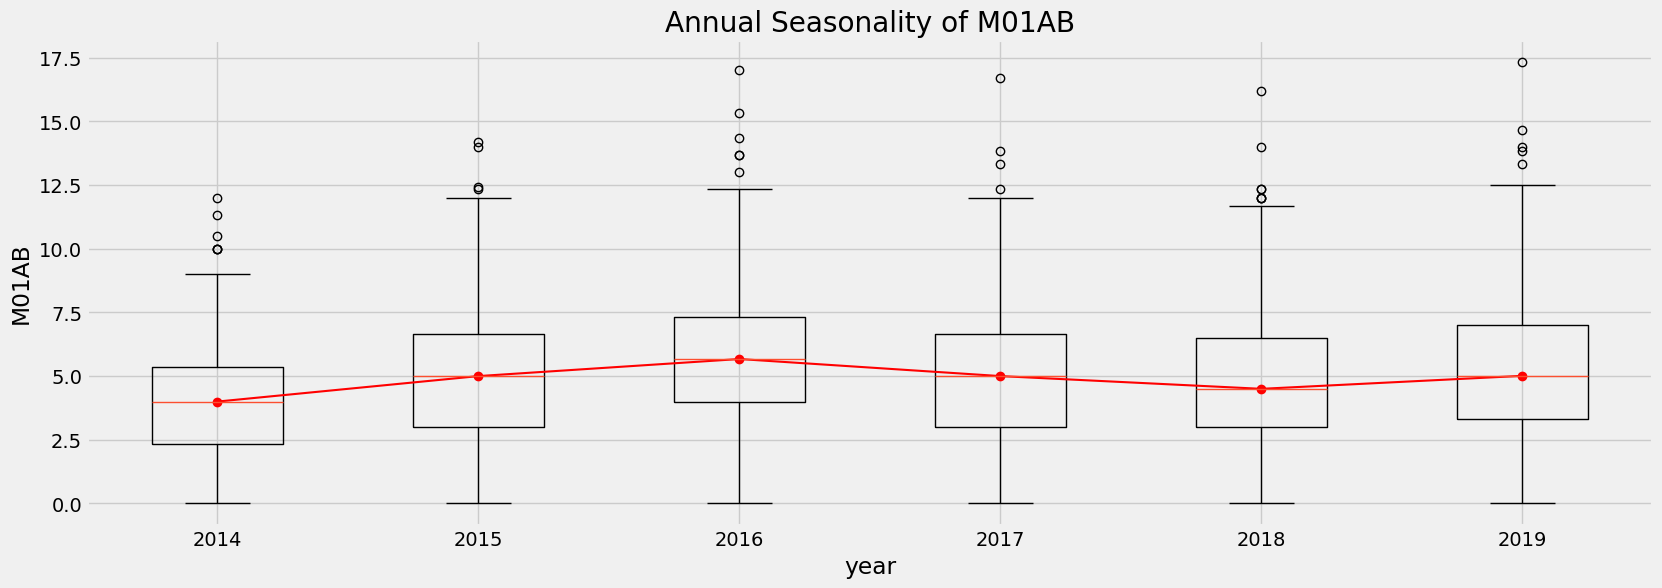

In [15]:
# Boxplot graph for annual seasonality
# ==============================================================================
# Extract year component from date
#df1['year'] = df['ds'].dt.year

# Create a dictionary to store the data for each year
data_anual = {}
for year in df['Year'].unique():
    data_anual[year] = df.loc[df['Year'] == year, 'y'].values

# Create a data list for the Boxplot chart
boxplot_data = [data_anual[year] for year in sorted(data_anual.keys())]

# Create the Boxplot chart
plt.figure(figsize=(18, 6))
plt.boxplot(boxplot_data, labels=sorted(data_anual.keys()))
plt.xlabel('year')
plt.ylabel('M01AB')
plt.title('Annual Seasonality of M01AB')

# Add the median line graph
medians = [np.median(data_anual[year]) for year in sorted(data_anual.keys())]
plt.plot(range(1, len(medians) + 1), medians, marker='o', color='red', linestyle='-')

plt.show()

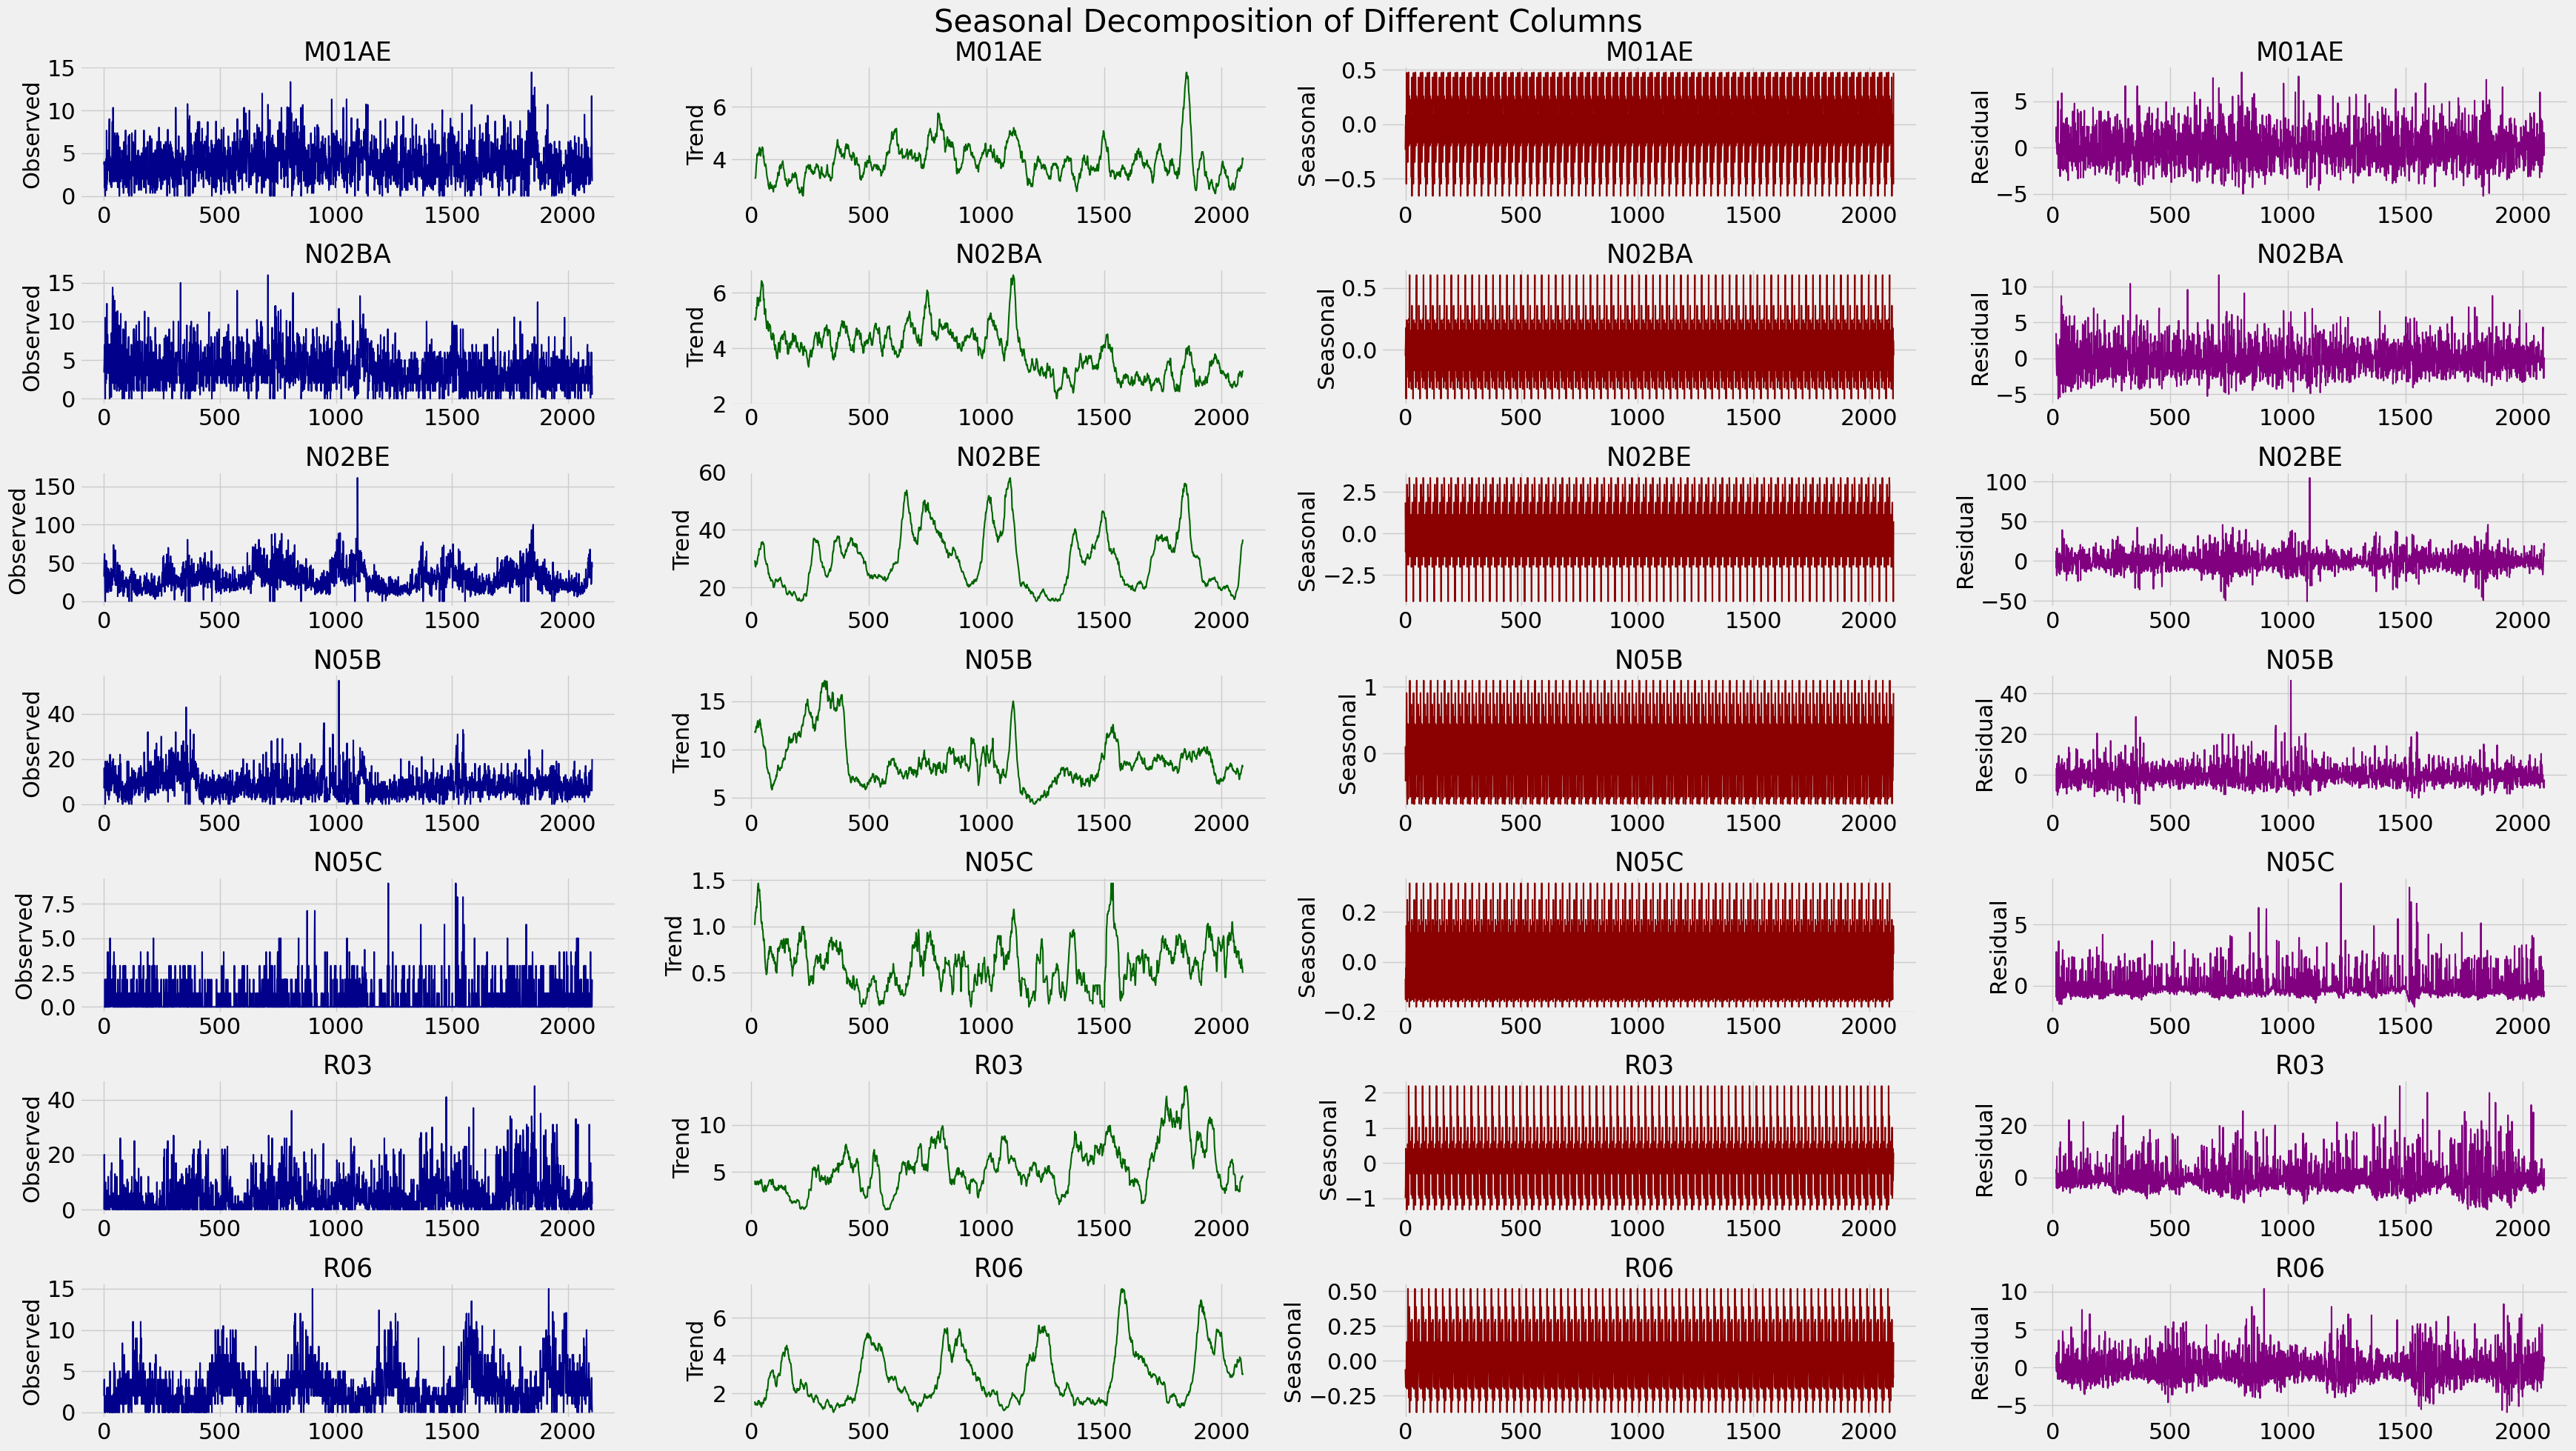

In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Define darker colors using RGB values
colors = [(0, 0, 139), (0, 100, 0), (139, 0, 0), (128, 0, 128)]  # Dark blue, Dark green, Dark red, Dark purple

# Normalize RGB values to range [0, 1]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

# Perform seasonal decomposition for each column
columns = ['M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
fig, axes = plt.subplots(len(columns), 4, figsize=(35, 20))

for i, col in enumerate(columns):
    decompose = seasonal_decompose(df[col], model='additive', period=30)
    
    decompose.observed.plot(ax=axes[i, 0], color=colors[0], fontsize=22)
    axes[i, 0].set_ylabel('Observed', fontsize=22)
    axes[i, 0].set_title(col, fontsize=25)
    
    decompose.trend.plot(ax=axes[i, 1], color=colors[1], fontsize=22)
    axes[i, 1].set_ylabel('Trend', fontsize=22)
    axes[i, 1].set_title(col, fontsize=25)
    
    decompose.seasonal.plot(ax=axes[i, 2], color=colors[2], fontsize=22)
    axes[i, 2].set_ylabel('Seasonal', fontsize=22)
    axes[i, 2].set_title(col, fontsize=25)
    
    decompose.resid.plot(ax=axes[i, 3], color=colors[3], fontsize=22)
    axes[i, 3].set_ylabel('Residual', fontsize=22)
    axes[i, 3].set_title(col, fontsize=25)

# Add main title
fig.suptitle('Seasonal Decomposition of Different Columns', fontsize=30)

plt.tight_layout()
plt.show()

## **Autocorrelation Plot**

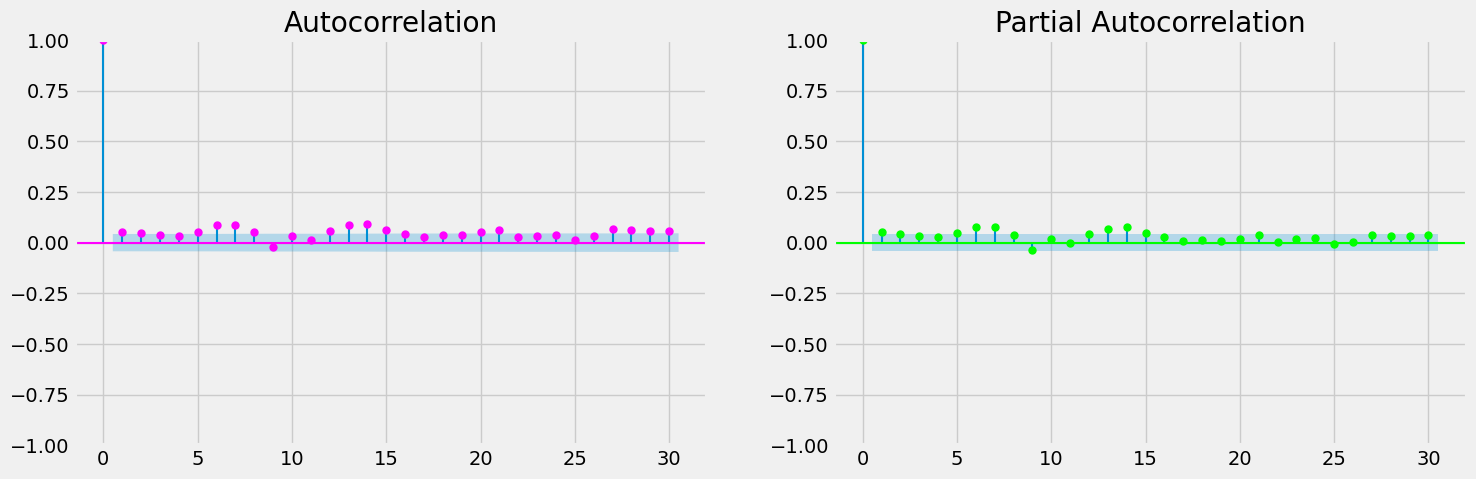

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')
plt.show()

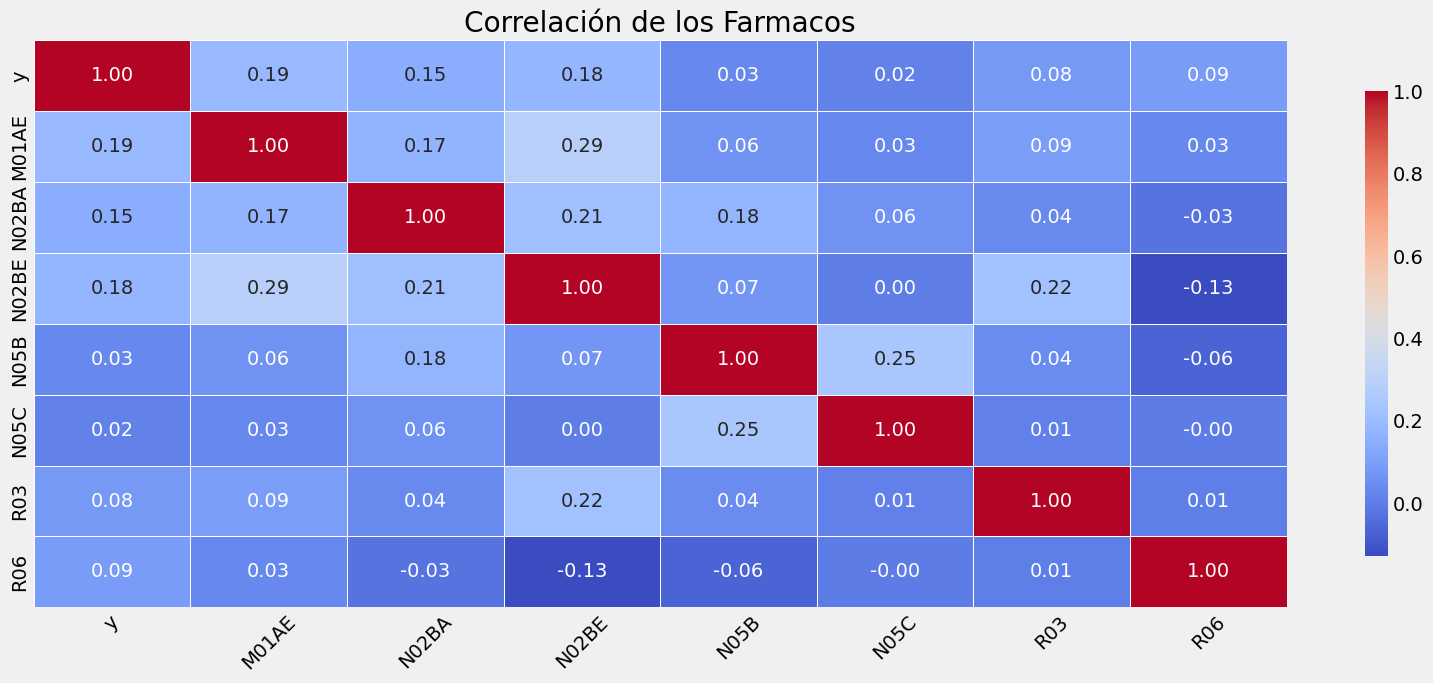

In [18]:
plt.figure(figsize=(18, 7))  # Set the figure size to be larger
sns.heatmap(df.iloc[:,1:9].corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt= '.2f', cbar_kws={"shrink": .82})  # Enlarge the heatmap, add linewidths, and change format to two decimal places
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Correlación de los Farmacos")
plt.show()

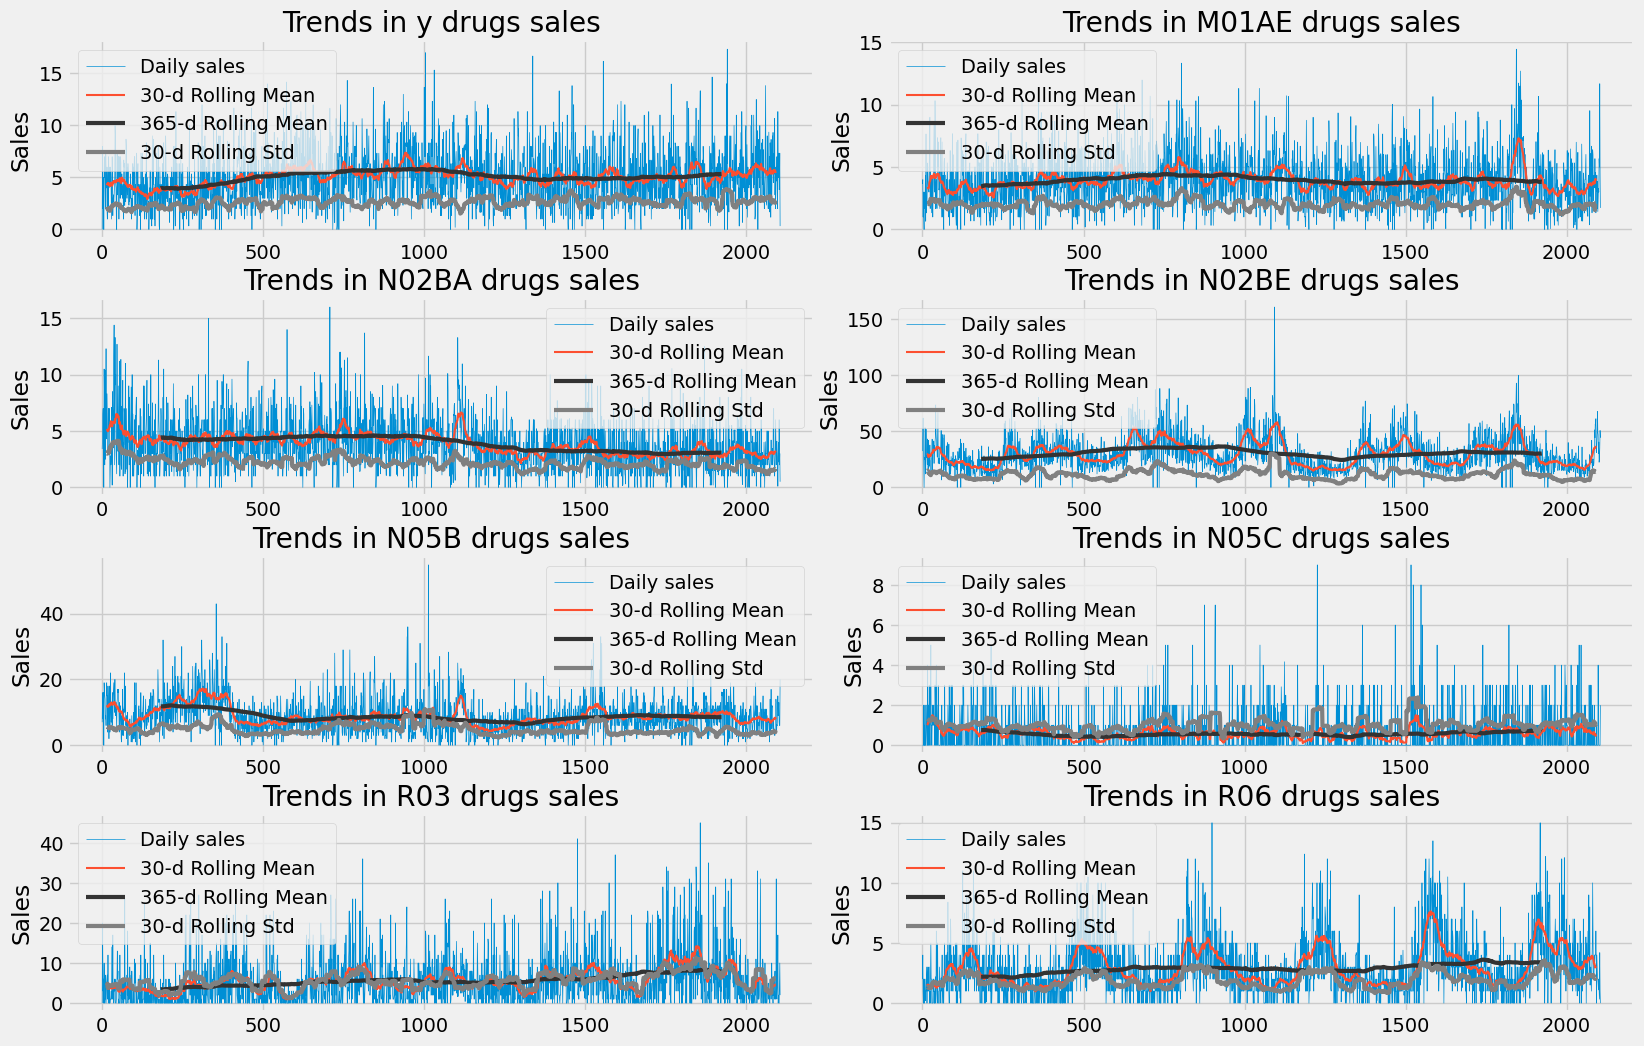

In [19]:
dfatc_daily = df[['ds', 'y', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
cols_plot = ['y','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
dfatc_365d = dfatc_daily[cols_plot].rolling(window=365, center=True).mean()
dfatc_30d = dfatc_daily[cols_plot].rolling(30, center=True).mean()
dfatc_std = dfatc_daily[cols_plot].rolling(30, center=True).std()
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(dfatc_daily.loc[:,x], linewidth=0.5, label='Daily sales')
    ax[rowindex,colindex].plot(dfatc_30d.loc[:,x], label='30-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_365d.loc[:,x], color='0.2', linewidth=3, label='365-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_std.loc[:,x], color='0.5', linewidth=3, label='30-d Rolling Std')
    ax[rowindex,colindex].set_ylabel('Sales')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in '+x+' drugs sales');   
    subplotindex=subplotindex+1
plt.show()

## Preparamos los datos para la División

In [20]:
farma = df[['ds', 'y', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
farma["unique_id"] = "M01AB"
farma

ds     y   M01AE  N02BA  N02BE  N05B  N05C   R03   R06 unique_id
0    2014-01-02  0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00     M01AB
1    2014-01-03  8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00     M01AB
2    2014-01-04  2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00     M01AB
3    2014-01-05  4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00     M01AB
4    2014-01-06  5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00     M01AB
...         ...   ...     ...    ...    ...   ...   ...   ...   ...       ...
2101 2019-10-04  7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00     M01AB
2102 2019-10-05  3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33     M01AB
2103 2019-10-06  4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20     M01AB
2104 2019-10-07  7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00     M01AB
2105 2019-10-08  0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00     M01AB

[2106 rows x 10 columns]

In [ ]:
#farma['5-day'] = farma.groupby('unique_id')['y'].rolling(window=5, ).mean().reset_index(0, drop=True)


# **Dividir los datos en entrenamiento y prueba** 

Dividamos nuestros datos en dos partes:

1. Datos para entrenar el modelo.
2. Datos para probar el modelo. Aquí usaremos los últimos 30 días.

In [21]:
train = farma[farma.ds<='2019-08-09'] 
test = farma[(farma['ds'] > '2019-08-09')]

test.drop("y",axis=1, inplace=True)
train.shape, test.shape

((2046, 10), (60, 9))

# **Implementation with MlForecast** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)



In [22]:
# StatsForecast y Mlforecast
# ==============================================================================
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from mlforecast.target_transforms import LocalRobustScaler, LocalStandardScaler, LocalMinMaxScaler


# Modelo de Regularizacion
#===========================================================================

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor

# Modelo Proceso Gausiano
#===========================================================================
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# Modelo de Distancia
#===========================================================================
from sklearn.neighbors import KNeighborsRegressor

In [23]:
kernel = DotProduct() + WhiteKernel()

In [24]:
lassoCV_model = {"LR": LinearRegression(),
                "Huber": HuberRegressor(),
                "Theil": TheilSenRegressor(),
                "Ransac": RANSACRegressor(max_trials = 5200, loss = "squared_error", random_state=42),
                "GPR": GaussianProcessRegressor(kernel=kernel,random_state=0),
                "knn": KNeighborsRegressor()
                }

In [25]:
mlf = MLForecast(models = lassoCV_model,
                 freq='D', 
                 lags = range(1, 24, 1),
                 lag_transforms={1: [expanding_mean],24: [(rolling_mean, 7)] },
                 target_transforms=[Differences([60]),LocalRobustScaler(scale='iqr')], # LocalRobustScaler(scale='iqr')  Differences([1]), LocalStandardScaler(), LocalMinMaxScaler()
                 date_features=["year", "month", "day"]
                 ) 

## **Fit the Model**

In [26]:
# fit the models
mlf.fit(train,  
 fitted=True, static_features= [],
prediction_intervals=PredictionIntervals(n_windows = 5, h = 60, method="conformal_distribution"))

MLForecast(models=[LR, Huber, Theil, Ransac, GPR, knn], freq=D, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'lag13', 'lag14', 'lag15', 'lag16', 'lag17', 'lag18', 'lag19', 'lag20', 'lag21', 'lag22', 'lag23', 'expanding_mean_lag1', 'rolling_mean_lag24_window_size7'], date_features=['year', 'month', 'day'], num_threads=1)

## **Predict Method**
Usaremos el método de predicción para pronosticar los últimos 30 días de la demanda de un medicamento MO1AB. Este método sólo tiene un parámetro, el horizonte de previsión.

In [27]:
forecast_df = mlf.predict(h = 60, level = [50, 60, 70, 80,90, 95], X_df = test ) 

forecast_df.head()

unique_id         ds         LR      Huber      Theil     Ransac        GPR  \
0     M01AB 2019-08-10  11.130120  11.178494  10.554130   8.510278  10.939901   
1     M01AB 2019-08-11   8.033475   8.440011   8.134337  16.669523   7.865396   
2     M01AB 2019-08-12   0.462007   0.378267   1.289181  -2.511680   0.314474   
3     M01AB 2019-08-13   2.328557   2.208612   2.372968   3.903503   2.165825   
4     M01AB 2019-08-14   7.144520   6.933536   7.342061   4.563860   6.976400   

     knn  LR-lo-95  LR-lo-90  ...  knn-lo-80  knn-lo-70  knn-lo-60  knn-lo-50  \
0  7.938  3.365621  3.921583  ...   2.061200   2.680083   3.081333   3.611750   
1  5.598  2.756112  3.044714  ...   1.847800   1.963900   2.015200   2.121000   
2 -0.556 -3.523784 -3.291477  ...  -4.350600  -4.083100  -3.878800  -3.214000   
3  4.648 -2.081802 -1.380804  ...   1.657533   2.128375   2.651500   3.116500   
4  7.666  3.243488  3.685141  ...   3.461600   4.221608   5.028533   5.623875   

   knn-hi-50  knn-hi-60  knn-hi-70  knn-hi-80  knn-hi-90  knn-hi-95  
0  12.264250  12.794667  13.195917  13.814800  15.195400  15.885700  
1   9.075000   9.180800   9.232100   9.348200   9.691100   9.862550  
2   2.102000   2.766800   2.971100   3.238600   3.727300   3.971650  
3   6.179500   6.644500   7.167625   7.638467   7.926317   8.070242  
4   9.708125  10.303467  11.110392  11.870400  12.466200  12.764100  

[5 rows x 80 columns]

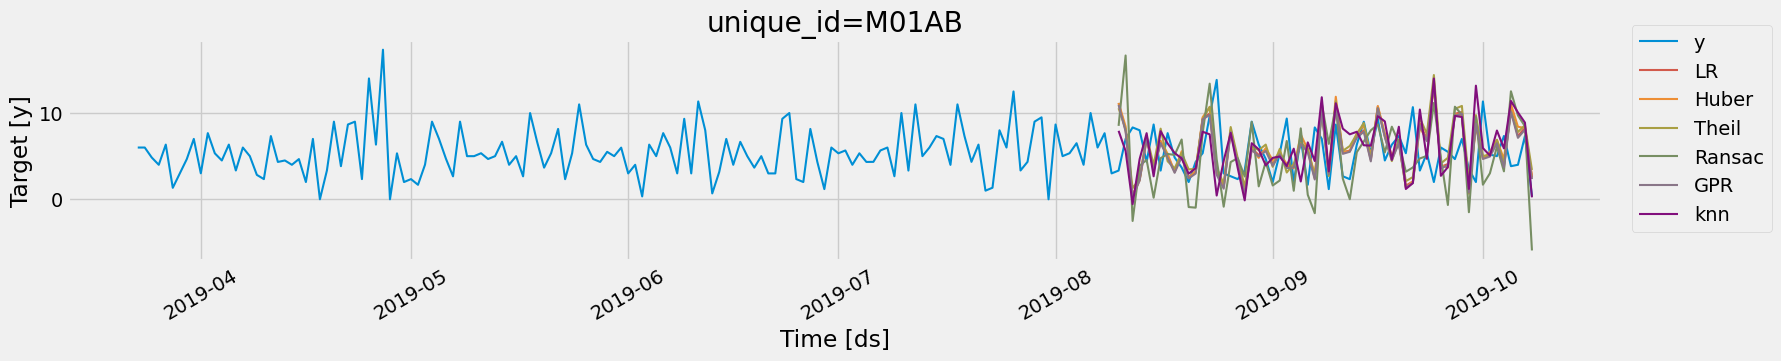

In [28]:
plot_series(farma, forecast_df,  max_insample_length=200,)

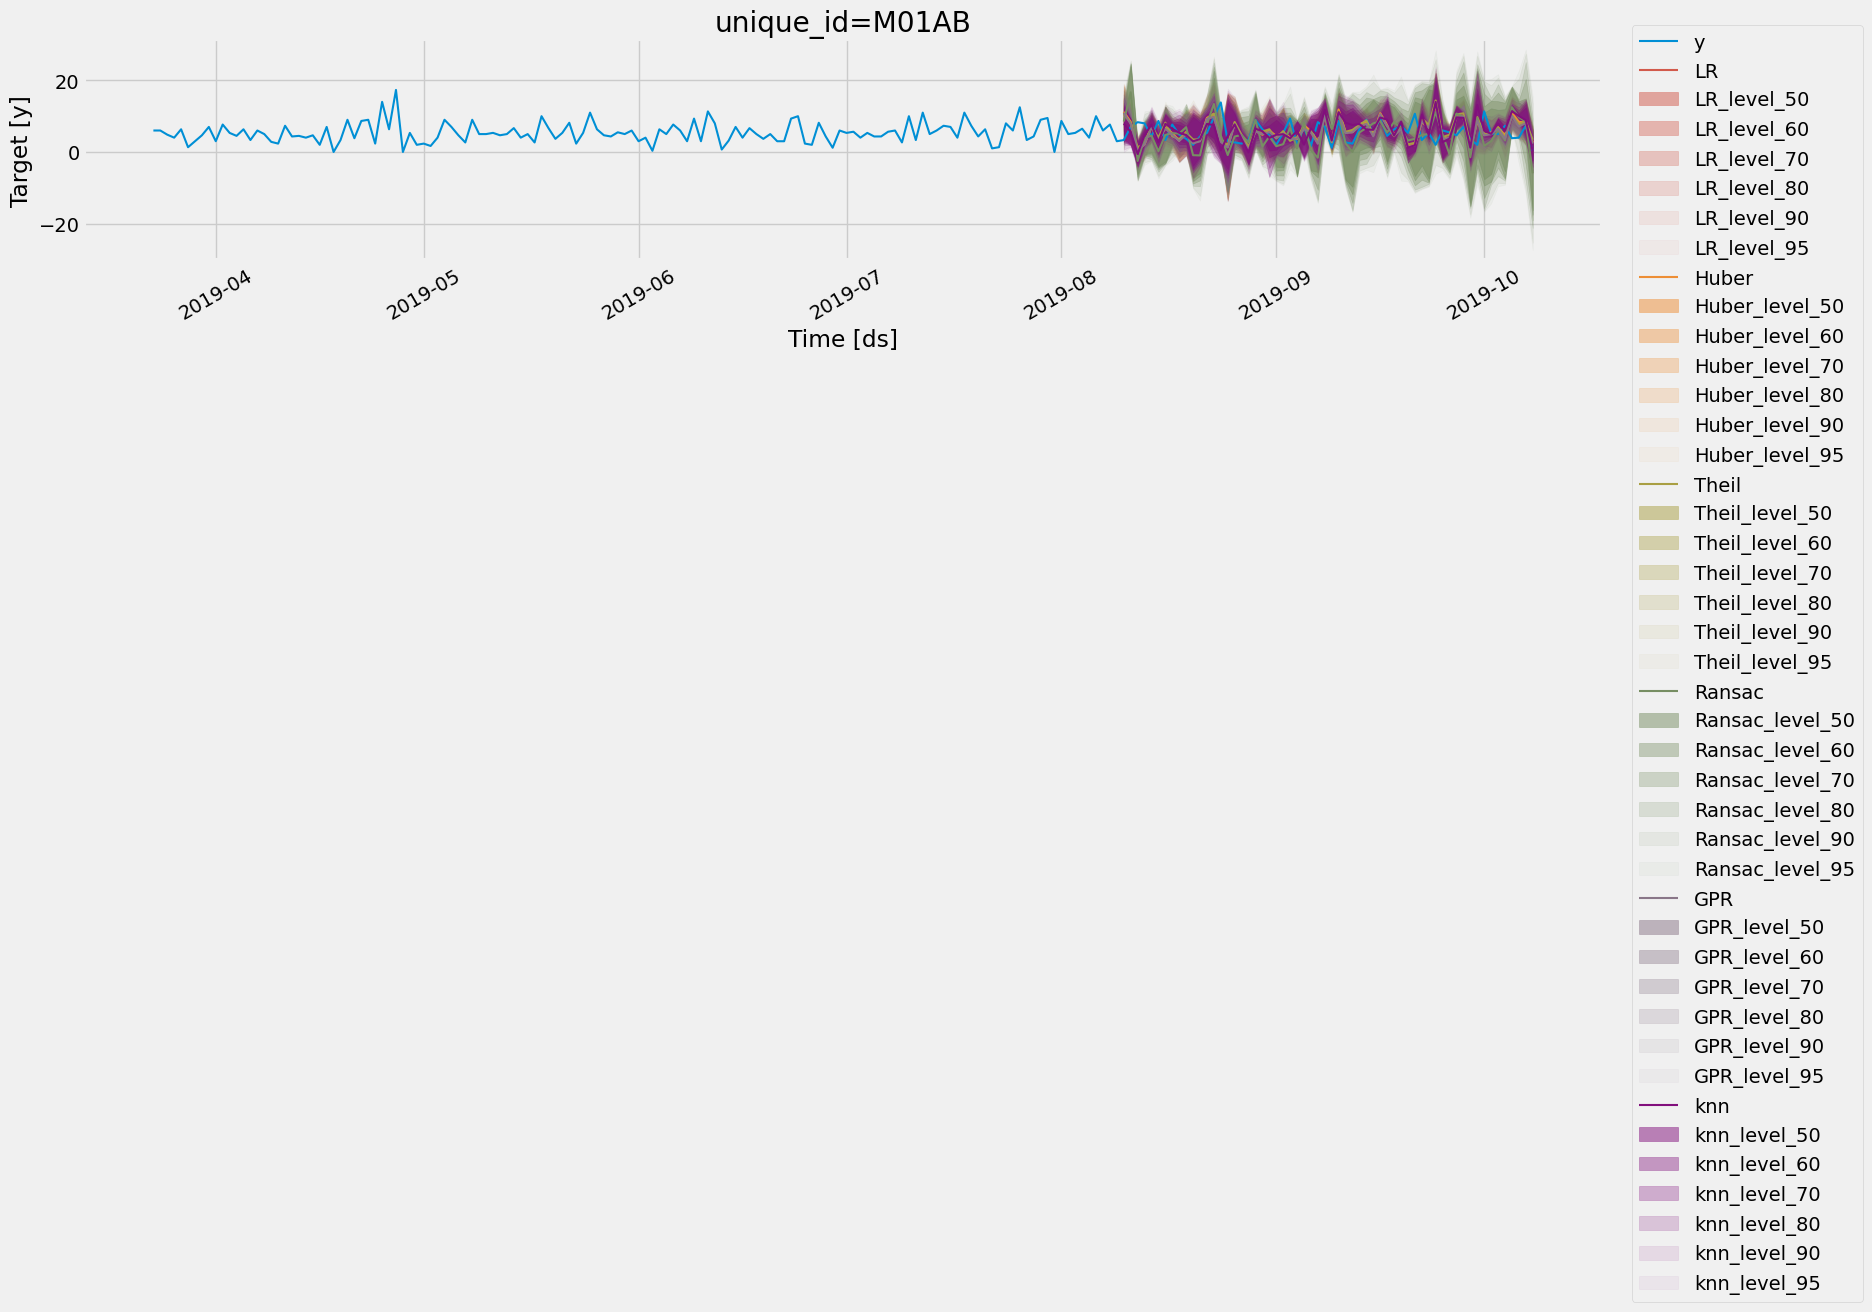

In [29]:
plot_series(farma, forecast_df,  max_insample_length=200, level = [50, 60, 70, 80,90, 95])

## **Evaluar el rendimiento del modelo**

### **Realizar cross-validation para Series de tiempo**

In [30]:
cv_result_ml = mlf.cross_validation(
    train, static_features= [],
    n_windows = 5,  
    h = 60,  )

In [31]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [32]:
evaluation_df_ml_rmse = evaluate_cross_validation(cv_result_ml.set_index("unique_id"), rmse)
evaluation_df_ml_rmse

LR     Huber     Theil     Ransac       GPR       knn  \
unique_id                                                                
M01AB      3.933815  3.929034  4.076554  14.636115  3.932939  4.073899   

          best_model  
unique_id             
M01AB          Huber

In [ ]:
evaluate_cross_validation(cv_result_ml.set_index("unique_id"), rmse)

In [ ]:
evaluate_cross_validation(cv_result_ml.set_index("unique_id"), rmse)

In [ ]:
evaluation_df_ml_rmse[["best_model"]]

In [33]:
plot_series(farma,forecast_df, max_insample_length = 100,  engine = 'plotly', models= ["Huber"], level = [50, 60, 70, 80,90, 95])

## Seleccionemos ahora los forecast con el mejor modelo

In [34]:
forecast_df.head()

unique_id         ds         LR      Huber      Theil     Ransac        GPR  \
0     M01AB 2019-08-10  11.130120  11.178494  10.554130   8.510278  10.939901   
1     M01AB 2019-08-11   8.033475   8.440011   8.134337  16.669523   7.865396   
2     M01AB 2019-08-12   0.462007   0.378267   1.289181  -2.511680   0.314474   
3     M01AB 2019-08-13   2.328557   2.208612   2.372968   3.903503   2.165825   
4     M01AB 2019-08-14   7.144520   6.933536   7.342061   4.563860   6.976400   

     knn  LR-lo-95  LR-lo-90  ...  knn-lo-80  knn-lo-70  knn-lo-60  knn-lo-50  \
0  7.938  3.365621  3.921583  ...   2.061200   2.680083   3.081333   3.611750   
1  5.598  2.756112  3.044714  ...   1.847800   1.963900   2.015200   2.121000   
2 -0.556 -3.523784 -3.291477  ...  -4.350600  -4.083100  -3.878800  -3.214000   
3  4.648 -2.081802 -1.380804  ...   1.657533   2.128375   2.651500   3.116500   
4  7.666  3.243488  3.685141  ...   3.461600   4.221608   5.028533   5.623875   

   knn-hi-50  knn-hi-60  knn-hi-70  knn-hi-80  knn-hi-90  knn-hi-95  
0  12.264250  12.794667  13.195917  13.814800  15.195400  15.885700  
1   9.075000   9.180800   9.232100   9.348200   9.691100   9.862550  
2   2.102000   2.766800   2.971100   3.238600   3.727300   3.971650  
3   6.179500   6.644500   7.167625   7.638467   7.926317   8.070242  
4   9.708125  10.303467  11.110392  11.870400  12.466200  12.764100  

[5 rows x 80 columns]

In [35]:
df1 = forecast_df[['ds', 'Huber', 'Huber-lo-95','Huber-hi-95', ]]
df1.head(20)

ds      Huber  Huber-lo-95  Huber-hi-95
0  2019-08-10  11.178494     3.208289    19.148700
1  2019-08-11   8.440011     2.862545    14.017478
2  2019-08-12   0.378267    -3.441558     4.198091
3  2019-08-13   2.208612    -1.941480     6.358704
4  2019-08-14   6.933536     2.953226    10.913847
5  2019-08-15   3.529137    -0.877975     7.936248
6  2019-08-16   6.786147     0.777888    12.794405
7  2019-08-17   5.268925     0.591176     9.946674
8  2019-08-18   3.167168    -2.778349     9.112686
9  2019-08-19   5.570287    -0.458278    11.598852
10 2019-08-20   2.501860    -8.145415    13.149135
11 2019-08-21   3.299947    -4.138564    10.738457
12 2019-08-22   9.515387     2.781283    16.249491
13 2019-08-23  10.670372     1.123555    20.217189
14 2019-08-24   3.420104     0.176033     6.664174
15 2019-08-25   1.524793   -13.578160    16.627745
16 2019-08-26   8.040937     0.498611    15.583263
17 2019-08-27   4.186282    -0.728897     9.101460
18 2019-08-28   0.858164    -4.229195     5.945524
19 2019-08-29   5.897316     1.419736    10.374895

### Significado de los Intervalos de Predicción al 60%, 70%, 80%, 90% y 95%

Los **intervalos de predicción** proporcionan un rango en el cual es probable que se encuentre el valor real de una variable dependiente (por ejemplo, las ventas) para un nuevo punto de datos, dado un nivel de confianza específico. El nivel de confianza representa la probabilidad de que el valor real caiga dentro de ese intervalo.

A continuación, se explica qué significa tener intervalos de predicción al 60%, 70%, 80%, 90% y 95%:

1. **Intervalo de Predicción al 60%**:
   - Hay un 60% de probabilidad de que el valor real caiga dentro de este intervalo.
   - Este intervalo es más estrecho en comparación con los intervalos de niveles de confianza más altos.
   - Existe un 40% de probabilidad de que el valor real esté fuera de este rango.

2. **Intervalo de Predicción al 70%**:
   - Hay un 70% de probabilidad de que el valor real caiga dentro de este intervalo.
   - Es un poco más amplio que el intervalo al 60%, proporcionando mayor confianza pero también mayor rango.
   - Hay un 30% de probabilidad de que el valor real esté fuera de este intervalo.

3. **Intervalo de Predicción al 80%**:
   - Hay un 80% de probabilidad de que el valor real caiga dentro de este intervalo.
   - El intervalo es más amplio, reflejando mayor incertidumbre y mayor confianza.
   - Existe un 20% de probabilidad de que el valor real esté fuera de este rango.

4. **Intervalo de Predicción al 90%**:
   - Hay un 90% de probabilidad de que el valor real caiga dentro de este intervalo.
   - Es aún más amplio que los anteriores, dando mayor cobertura a posibles valores reales.
   - Hay un 10% de probabilidad de que el valor real esté fuera de este intervalo.

5. **Intervalo de Predicción al 95%**:
   - Hay un 95% de probabilidad de que el valor real caiga dentro de este intervalo.
   - Es uno de los intervalos más amplios, ofreciendo alta confianza.
   - Solo hay un 5% de probabilidad de que el valor real esté fuera de este rango.

### Interpretación y Uso Práctico

- **Confianza vs. Precisión**: A medida que aumenta el nivel de confianza (por ejemplo, de 60% a 95%), el intervalo de predicción se vuelve más amplio. Esto significa que estamos más seguros de que el valor real estará dentro del intervalo, pero el rango es mayor, lo que implica menor precisión.
- **Decisiones Basadas en Intervalos**: Dependiendo de la tolerancia al riesgo y del contexto, puedes elegir utilizar diferentes niveles de confianza.
  - **Decisiones conservadoras**: Si es crucial cubrir la mayoría de los posibles resultados (por ejemplo, para evitar subabastecimiento en inventarios), podrías utilizar un intervalo al 95% o 90%.
  - **Decisiones enfocadas en precisión**: Si prefieres tener un rango más estrecho para decisiones más precisas y estás dispuesto a aceptar un mayor riesgo de que el valor real esté fuera del intervalo, podrías utilizar un intervalo al 60% o 70%.

### Ejemplo Ilustrativo

Supongamos que estás pronosticando ventas para un día específico y obtienes los siguientes intervalos de predicción:

- **60%**: Entre 100 y 150 unidades.
- **70%**: Entre 90 y 160 unidades.
- **80%**: Entre 80 y 170 unidades.
- **90%**: Entre 70 y 180 unidades.
- **95%**: Entre 60 y 190 unidades.

- **Análisis**:
  - **Intervalo al 60%**: Más estrecho, menos confianza. Hay un 40% de probabilidad de que las ventas reales estén fuera de este rango.
  - **Intervalo al 95%**: Más amplio, mayor confianza. Solo hay un 5% de probabilidad de que las ventas reales estén fuera de este rango.

### Consideraciones Importantes

- **Selección del Nivel de Confianza**: La elección del nivel de confianza depende del equilibrio que desees entre confianza y precisión, y de las implicaciones prácticas de tus decisiones.
- **Contexto de Negocio**: En escenarios donde los costos de sobreestimar o subestimar son altos, puede ser preferible utilizar intervalos de predicción más amplios con niveles de confianza mayores.
- **Comunicación de Incertidumbre**: Es importante comunicar claramente los intervalos de predicción y su nivel de confianza a las partes interesadas para una toma de decisiones informada.

### Conclusión

Los intervalos de predicción al 60%, 70%, 80%, 90% y 95% te ofrecen diferentes opciones para entender y comunicar la incertidumbre en tus pronósticos. Comprender lo que representan estos intervalos te ayuda a tomar decisiones más informadas y ajustar tus estrategias según el nivel de riesgo que estés dispuesto a aceptar.

## `Significado de los Intervalos de Predicción al 95%`

Los intervalos de predicción al 95% proporcionan un rango en el cual se espera que caiga el valor real con una probabilidad del 95%. Esto significa que hay un 95% de confianza de que el valor real estará dentro de este rango, y un 5% de probabilidad de que esté fuera. 

En tu ejemplo, cada intervalo se representa con dos columnas: `Huber-lo-95` (el límite inferior) y `Huber-hi-95` (el límite superior). Por ejemplo, para el pronóstico del 10 de agosto de 2019:

- Pronóstico (`Huber`): 11.178494
- Límite Inferior (`Huber-lo-95`): 3.208289
- Límite Superior (`Huber-hi-95`): 19.148700

Esto significa que hay un 95% de confianza de que el valor real de las ventas estará entre 3.208289 y 19.148700.

### Análisis de los Pronósticos

Vamos a realizar un análisis basado en los datos proporcionados:

1. **Evaluación General de los Pronósticos**:
   - Las predicciones varían considerablemente, lo que indica fluctuaciones en las ventas.
   - El rango de los intervalos de predicción también varía, lo cual podría reflejar la incertidumbre del modelo en diferentes puntos del tiempo.

2. **Predicciones Negativas**:
   - Algunas de las predicciones tienen límites inferiores negativos (`Huber-lo-95`), lo cual no tiene sentido en el contexto de ventas, ya que las ventas no pueden ser negativas. Esto sugiere que el modelo puede necesitar ajustes o que la variabilidad de los datos es alta.

3. **Intervalos de Confianza**:
   - La amplitud de los intervalos de confianza puede ofrecer información sobre la certeza del modelo respecto a sus predicciones. Intervalos más amplios indican mayor incertidumbre.
   - Por ejemplo, el intervalo para el 10 de agosto de 2019 es de 15.940411, mientras que para el 12 de agosto de 2019 es de 7.639649. Esto sugiere que el modelo está más seguro sobre la predicción del 12 de agosto que sobre la del 10 de agosto.

4. **Visualización de Resultados**:
   - Visualizar los pronósticos y los intervalos de predicción puede ayudar a identificar patrones y anomalias.


In [ ]:
from scipy.stats import norm

# Calcular estadísticas de interés
ventas_promedio = np.mean(df1["Huber"])

sns.set(rc={"figure.figsize":(15, 4)})
sns.distplot(df1['Huber'], fit= norm, )
plt.title('Gráfico de Densidad de las Predicciones Huber')
plt.axvline(x=ventas_promedio, color='r', linestyle='--', label=f'Promedio: {ventas_promedio:.2f}')
plt.xlabel('Predicciones Huber')
plt.ylabel('Densidad')
plt.legend()
plt.show();

## `Simulacion Monte Carlo`

### Significado y Análisis de la Simulación de Monte Carlo

La simulación de Monte Carlo es una técnica estadística utilizada para modelar la probabilidad de diferentes resultados en un proceso que no se puede predecir con certeza debido a la intervención de variables aleatorias. Esta técnica es especialmente útil para prever y gestionar riesgos y tomar decisiones en situaciones de incertidumbre.

#### Significado de la Simulación de Monte Carlo

1. **Generación de Escenarios Futuros:**
   - La simulación de Monte Carlo genera múltiples escenarios futuros posibles utilizando distribuciones de probabilidad basadas en los datos históricos. En este caso, hemos utilizado la media y la desviación estándar de los pronósticos para generar simulaciones de posibles valores futuros de la serie temporal.

2. **Evaluación de Incertidumbre y Riesgo:**
   - Al generar un gran número de escenarios (en este caso, 1000 simulaciones), se puede evaluar la incertidumbre y el riesgo asociado con los pronósticos. Esto permite a los analistas y tomadores de decisiones comprender mejor la variabilidad y los posibles resultados extremos.

3. **Visualización de Intervalos de Confianza:**
   - La simulación de Monte Carlo proporciona una visualización de los intervalos de confianza, mostrando los rangos dentro de los cuales se espera que caigan los valores futuros con un cierto nivel de confianza (por ejemplo, el 95% de los intervalos de predicción en los datos proporcionados).


1. Simulacion Monte Carlo


In [36]:
df1.head()

ds      Huber  Huber-lo-95  Huber-hi-95
0 2019-08-10  11.178494     3.208289    19.148700
1 2019-08-11   8.440011     2.862545    14.017478
2 2019-08-12   0.378267    -3.441558     4.198091
3 2019-08-13   2.208612    -1.941480     6.358704
4 2019-08-14   6.933536     2.953226    10.913847

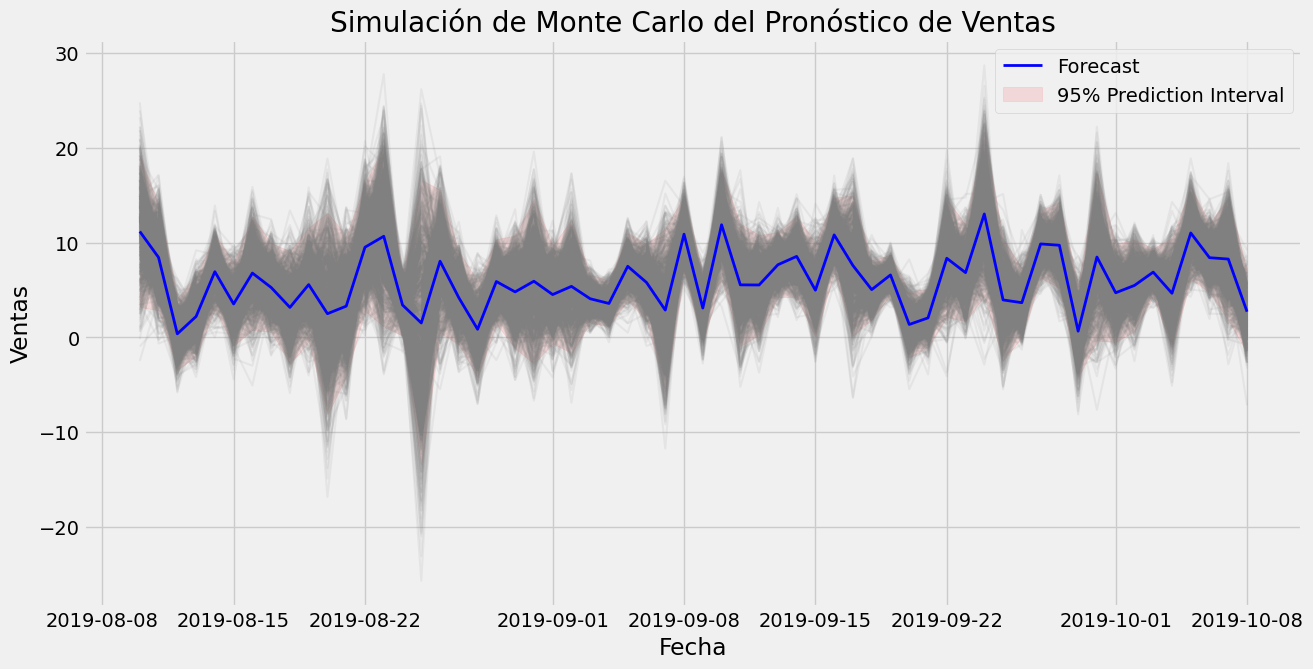

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Calcular la media y la desviación estándar
df1['mean'] = df1['Huber']
df1['std_dev'] = (df1['Huber-hi-95'] - df1['Huber-lo-95']) / (2 * 1.96)

# Generar simulaciones de Monte Carlo
n_simulations = 1000
simulations = np.random.normal(loc=df1['mean'].values[:, None], scale=df1['std_dev'].values[:, None], size=(len(df1), n_simulations))

# Graficar los resultados
plt.figure(figsize=(14, 7))

# Plot de las simulaciones
for i in range(n_simulations):
    plt.plot(df1['ds'], simulations[:, i], color='gray', alpha=0.1,)

# Plot del forecast y los intervalos de predicción
plt.plot(df1['ds'], df1['Huber'], label='Forecast', color='blue', linewidth=2)
plt.fill_between(df1['ds'], df1['Huber-lo-95'], df1['Huber-hi-95'], color='red', alpha=0.1, label='95% Prediction Interval')

plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Simulación de Monte Carlo del Pronóstico de Ventas')
plt.legend()
plt.show()

#### Análisis de la Simulación de Monte Carlo

1. **Interpretación de Resultados:**
   - Los resultados de la simulación muestran múltiples trayectorias posibles de la variable de interés a lo largo del tiempo. Cada línea gris en el gráfico representa una simulación diferente, y juntas forman un "abanico" que ilustra la amplitud de posibles resultados futuros.
   - El forecast (pronóstico) original se muestra en azul, mientras que los intervalos de predicción del 95% proporcionan un rango dentro del cual se espera que caigan la mayoría de los valores simulados.

2. **Evaluación de la Exactitud y Precisión:**
   - La diferencia entre el pronóstico original y las simulaciones puede ayudar a evaluar la exactitud y la precisión del modelo de forecasting. Si las simulaciones tienden a caer dentro de los intervalos de predicción y cerca del pronóstico original, se puede concluir que el modelo tiene un buen rendimiento.

3. **Identificación de Escenarios de Riesgo:**
   - Los valores simulados que se desvían significativamente del pronóstico original pueden indicar posibles escenarios de riesgo. Estos escenarios pueden ser utilizados para planificar estrategias de mitigación y tomar decisiones informadas para minimizar el impacto de resultados adversos.

4. **Decisiones Estratégicas:**
   - Al comprender la variabilidad y los posibles resultados futuros, las empresas pueden tomar decisiones estratégicas mejor informadas, como ajustar los precios, planificar la gestión de inventarios, y desarrollar planes de contingencia para eventos inesperados.


La simulación de Monte Carlo es una herramienta poderosa para prever la incertidumbre y el riesgo en los pronósticos. Al generar múltiples escenarios futuros, esta técnica permite a los analistas y tomadores de decisiones evaluar la variabilidad y planificar en consecuencia. En este caso, la simulación proporciona una comprensión más profunda de los posibles valores futuros de la serie temporal, ayudando a gestionar mejor la toma de decisiones y minimizar el riesgo.

In [38]:
# Crear un DataFrame para las simulaciones
simulations_df = pd.DataFrame(simulations, index=df1['ds'], columns=[f'simulation_{i+1}' for i in range(n_simulations)])
simulations_df.head()

simulation_1  simulation_2  simulation_3  simulation_4  \
ds                                                                   
2019-08-10      5.997677     11.219864     14.973778     11.008888   
2019-08-11      8.256318      9.681112      2.137870      7.327678   
2019-08-12     -1.351366     -2.073162     -2.345443      1.148168   
2019-08-13      2.154244      4.227011     -2.071852     -1.586306   
2019-08-14      6.935604      6.455297      5.960922      7.877591   

            simulation_5  simulation_6  simulation_7  simulation_8  \
ds                                                                   
2019-08-10      7.017355     13.342451     12.632021     13.075458   
2019-08-11      9.923179     11.858362     11.960724      3.184787   
2019-08-12     -3.417496      0.544834     -1.144110     -1.808453   
2019-08-13      2.378438      2.201763      2.104719      0.951544   
2019-08-14      7.988041      7.825844      5.968017      6.807812   

            simulation_9  simulation_10  ...  simulation_991  simulation_992  \
ds                                       ...                                   
2019-08-10     12.873517       9.154272  ...        7.394057        9.404897   
2019-08-11      7.183509      13.382218  ...        9.583507       11.946076   
2019-08-12      0.536213       1.498886  ...        3.211521       -0.668136   
2019-08-13      5.758071       3.733160  ...        1.585548       -1.764303   
2019-08-14      8.892873       6.622087  ...        7.399666        6.177898   

            simulation_993  simulation_994  simulation_995  simulation_996  \
ds                                                                           
2019-08-10        4.282827       10.359279       14.365301        9.863142   
2019-08-11       10.785886       11.212345        3.608067        9.081044   
2019-08-12       -2.179956       -1.288673        1.182859        1.272936   
2019-08-13        4.500683       -2.479438        1.919631        6.362760   
2019-08-14        7.240813        5.016932        5.856795        7.984267   

            simulation_997  simulation_998  simulation_999  simulation_1000  
ds                                                                           
2019-08-10       12.746680        9.484710        6.722586         7.014424  
2019-08-11        5.184688       14.531438        8.715714        12.758656  
2019-08-12       -0.396626       -1.997261        0.550223         1.149734  
2019-08-13        4.235959        4.470877        2.452120         6.849620  
2019-08-14        7.840904        8.664175        7.676838         7.382871  

[5 rows x 1000 columns]

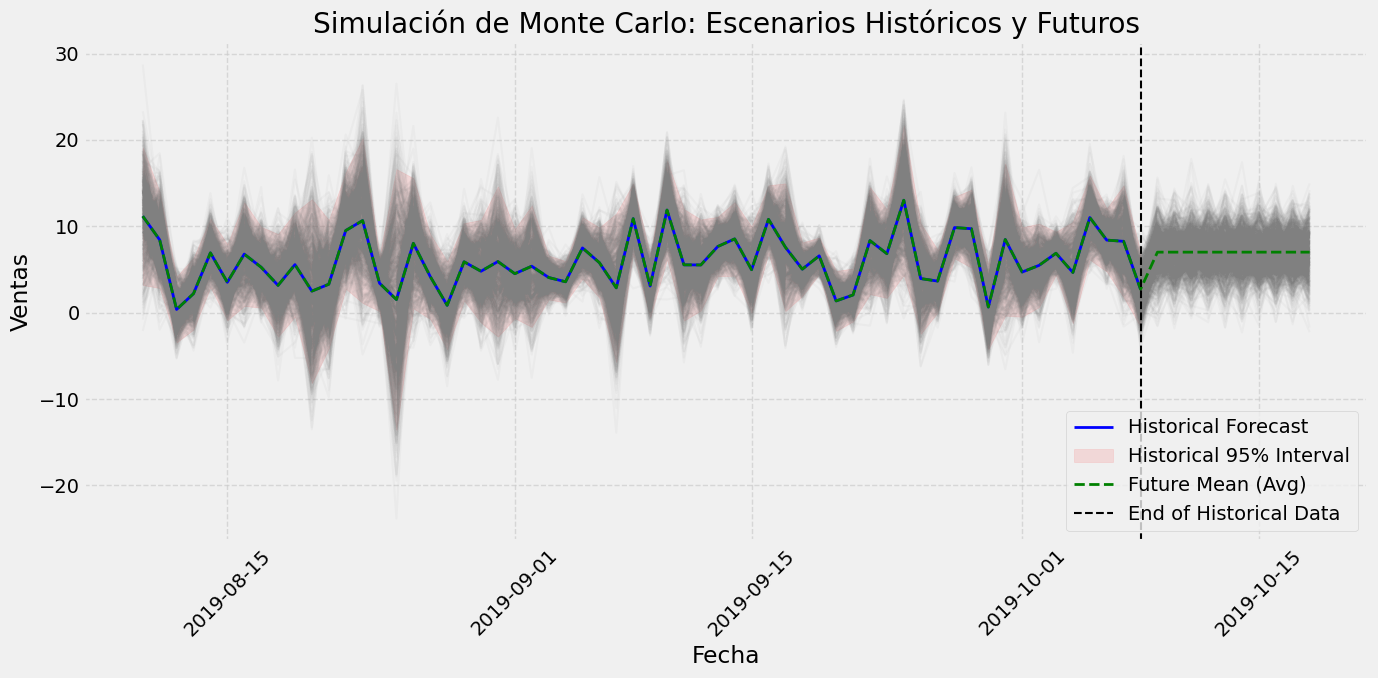

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Step 2: Calculate mean and standard deviation for historical data
df1['mean'] = df1['Huber']
df1['std_dev'] = (df1['Huber-hi-95'] - df1['Huber-lo-95']) / (2 * 1.96)

# Step 3: Generate future dates and assume stationary mean/std_dev
n_future_days = 10
last_date = df1['ds'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_future_days, freq='D')

# Use the average of the last 5 days' mean and std_dev as a simple forecast
future_mean = df1['mean'].tail(5).mean()
future_std_dev = df1['std_dev'].tail(5).mean()

future_df = pd.DataFrame({
    'ds': future_dates,
    'mean': future_mean,
    'std_dev': future_std_dev
})

# Combine historical and future data
full_df = pd.concat([df1[['ds', 'mean', 'std_dev']], future_df], ignore_index=True)

# Step 4: Monte Carlo simulation for both historical and future periods
n_simulations = 1000
simulations = np.random.normal(loc=full_df['mean'].values[:, None], 
                               scale=full_df['std_dev'].values[:, None], 
                               size=(len(full_df), n_simulations))

# Step 5: Plotting
plt.figure(figsize=(14, 7))

# Plot all simulations
for i in range(n_simulations):
    plt.plot(full_df['ds'], simulations[:, i], color='gray', alpha=0.05)

# Plot historical forecast and 95% prediction interval
plt.plot(df1['ds'], df1['Huber'], label='Historical Forecast', color='blue', linewidth=2)
plt.fill_between(df1['ds'], df1['Huber-lo-95'], df1['Huber-hi-95'], 
                 color='red', alpha=0.1, label='Historical 95% Interval')

# Plot future mean (extended as a dotted line)
plt.plot(full_df['ds'], full_df['mean'], label='Future Mean (Avg)', color='green', linestyle='--', linewidth=2)

# Add a vertical line to separate historical and future
plt.axvline(x=last_date, color='black', linestyle='--', label='End of Historical Data')

plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Simulación de Monte Carlo: Escenarios Históricos y Futuros')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### `2. Evaluación de Incertidumbre y Riesgo`

### Value at Risk (VaR)

**Value at Risk (VaR)** es una medida estadística utilizada para cuantificar el riesgo financiero de una inversión o cartera. Indica la pérdida máxima que una inversión podría experimentar dentro de un horizonte temporal específico, dado un nivel de confianza determinado. En otras palabras, el VaR responde a la pregunta: "¿Cuál es la pérdida máxima que puedo esperar con un nivel de confianza del X% en un periodo de tiempo Y?"

#### Componentes del VaR:
1. **Horizonte Temporal**: El periodo durante el cual se estima la pérdida potencial (por ejemplo, un día, una semana, un mes).
2. **Nivel de Confianza**: La probabilidad de que la pérdida no exceda el valor calculado (comúnmente 95% o 99%).
3. **Pérdida Máxima**: La cuantía de la pérdida esperada dentro del horizonte temporal y nivel de confianza especificados.

#### Métodos para Calcular el VaR:
1. **VaR Paramétrico (Varianza-Covarianza)**: Asume una distribución normal de los rendimientos y utiliza la media y la desviación estándar para estimar las pérdidas.
2. **VaR Histórico**: Utiliza datos históricos para simular posibles pérdidas futuras.
3. **VaR por Monte Carlo**: Genera múltiples escenarios posibles mediante simulaciones basadas en datos iniciales - Definición, qué es y concepto - Economipedia](https://economipedia.com/definiciones/valor-en-riesgo-var.html) and How It’s Computed - Investopedia](https://www.investopedia.com/terms/v/var.asp) | Definition, Components, & Calculation](https://www.financestrategists.com/wealth-management/investment-risk/value-at-risk-var/).

### Expected Shortfall (ES)

**Expected Shortfall (ES)**, también conocido como **Conditional Value at Risk (CVaR)**, es una medida de riesgo que cuantifica la pérdida esperada en los peores escenarios, más allá del umbral del VaR. En otras palabras, el ES responde a la pregunta: "¿Cuál es la pérdida promedio en los peores casos que exceden el VaR?"

#### Características del ES:
1. **Sensibilidad a la Cola de la Distribución**: El ES es más sensible a la forma de la cola de la distribución de pérdidas, lo que lo hace más conservador que el VaR.
2. **Media de las Pérdidas Extremas**: Calcula la media de las pérdidas que ocurren en el peor X% de los casos, donde X es el nivel de confianza.
3. **Medida Coherente de Riesgo**: A diferencia del VaR, el ES es una medida coherente de riesgo, lo que significa que cumple con ciertas propiedades matemáticas deseables para la gestión del riesgo - Economipedia](https://economipedia.com/definiciones/perdida-esperada-expected-shortfall.html): Definition, Uses, Formula - Investopedia](https://www.investopedia.com/terms/c/conditional_value_at_risk.asp).

### Comparación entre VaR y ES

- **VaR**: Proporciona una estimación de la pérdida máxima con un nivel de confianza específico, pero no considera las pérdidas más allá de ese umbral.
- **ES**: Proporciona una estimación más completa al considerar la media de las pérdidas en los peores escenarios, ofreciendo una visión más conservadora del riesgo.

Ambas medidas son herramientas importantes en la gestión del riesgo financiero y se utilizan para evaluar y controlar la exposición al riesgo en carteras de inversión y otras aplicaciones financieras.


In [40]:
df1.head()

ds      Huber  Huber-lo-95  Huber-hi-95       mean   std_dev
0 2019-08-10  11.178494     3.208289    19.148700  11.178494  4.066432
1 2019-08-11   8.440011     2.862545    14.017478   8.440011  2.845646
2 2019-08-12   0.378267    -3.441558     4.198091   0.378267  1.948890
3 2019-08-13   2.208612    -1.941480     6.358704   2.208612  2.117394
4 2019-08-14   6.933536     2.953226    10.913847   6.933536  2.030771

In [45]:
# Parámetros del forecast de ventas
media_ventas = np.mean(df1['Huber'])
std_ventas = np.std(df1['Huber'])

n_simulaciones = 10000  # Número de simulaciones

# Realizar la simulación de Monte Carlo
simulaciones = np.random.normal(media_ventas, std_ventas, n_simulaciones)

# Calcular estadísticas de interés
ventas_promedio = np.mean(simulaciones)
intervalo_confianza_95 = np.percentile(simulaciones, [2.5, 97.5])
value_at_risk_5 = np.percentile(simulaciones, 5)
expected_shortfall_5 = np.mean(simulaciones[simulaciones < value_at_risk_5])

print(f"Ventas promedio del Forecast: {media_ventas:.2f}")
print(f"Ventas promedio: {ventas_promedio:.2f}")
print(f"Intervalo de confianza al 95%: {intervalo_confianza_95}")
print(f"Value at Risk al 5%: {value_at_risk_5:.2f}")
print(f"Expected Shortfall al 5%: {expected_shortfall_5:.2f}")

Ventas promedio del Forecast: 5.94
Ventas promedio: 5.91
Intervalo de confianza al 95%: [-0.04028266 11.76248193]
Value at Risk al 5%: 0.92
Expected Shortfall al 5%: -0.34


In [53]:
std_ventas

3.0456429987248876

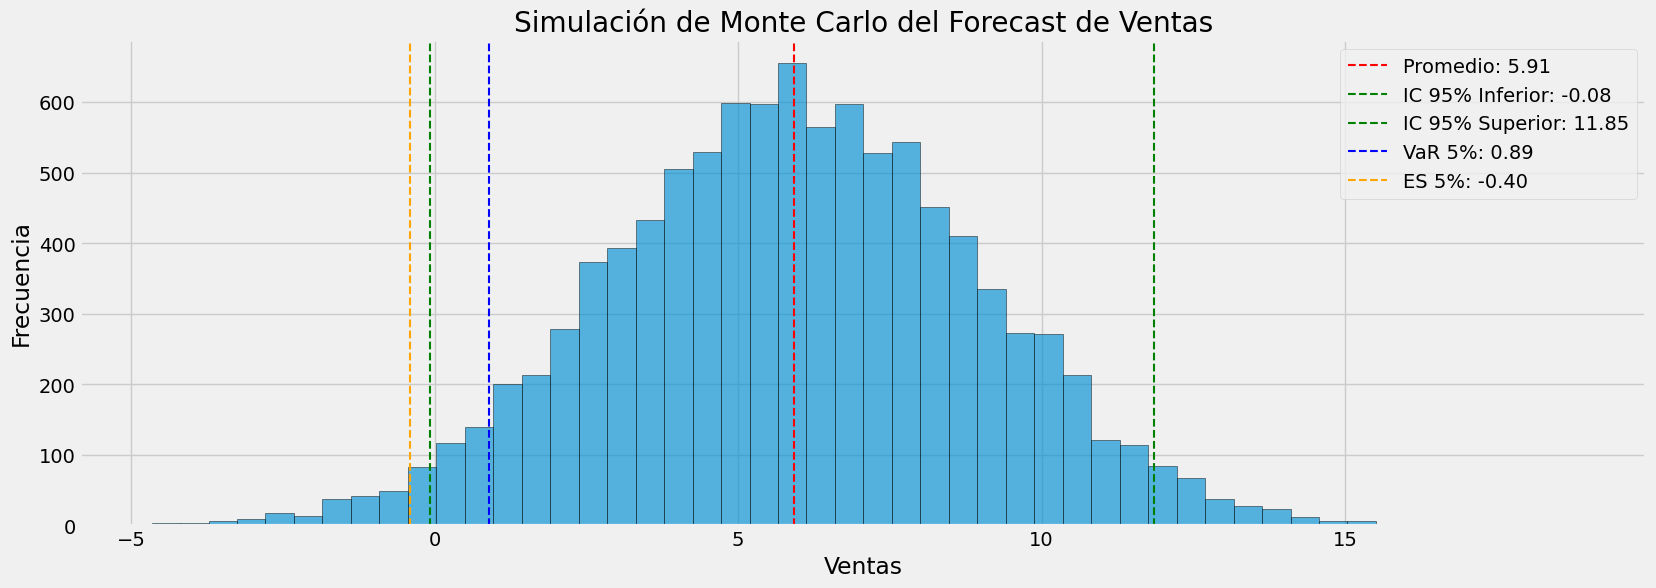

In [43]:
# Visualizar los resultados de la simulación
plt.figure(figsize = (18,6))
plt.hist(simulaciones, bins=50, edgecolor='k', alpha=0.65)
plt.axvline(x=ventas_promedio, color='r', linestyle='--', label=f'Promedio: {ventas_promedio:.2f}')
plt.axvline(x=intervalo_confianza_95[0], color='g', linestyle='--', label=f'IC 95% Inferior: {intervalo_confianza_95[0]:.2f}')
plt.axvline(x=intervalo_confianza_95[1], color='g', linestyle='--', label=f'IC 95% Superior: {intervalo_confianza_95[1]:.2f}')
plt.axvline(x=value_at_risk_5, color='b', linestyle='--', label=f'VaR 5%: {value_at_risk_5:.2f}')
plt.axvline(x=expected_shortfall_5, color='orange', linestyle='--', label=f'ES 5%: {expected_shortfall_5:.2f}')
plt.legend()
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.title('Simulación de Monte Carlo del Forecast de Ventas')
plt.show()

Claro, analicemos estos resultados:

### Ventas Promedio: 5.94
Esto representa el promedio de las ventas esperadas. En general, puedes considerar esto como el valor central de tu distribución de ventas. En este caso, el valor promedio de las ventas es 5.94 unidades.

### Intervalo de Confianza al 95%: [0.05540349, 12.1114682]
El intervalo de confianza al 95% proporciona un rango en el cual puedes estar 95% seguro de que caerán las ventas reales. Esto significa que hay un 95% de probabilidad de que las ventas reales estén entre 0.05540349 y 12.1114682 unidades. Este intervalo es bastante amplio, lo que sugiere que hay bastante incertidumbre en las predicciones de ventas.

### Value at Risk (VaR) al 5%: 0.90
El Value at Risk (VaR) al 5% indica que hay un 5% de probabilidad de que las ventas caigan por debajo de 0.90 unidades. Este valor es útil para entender el riesgo de pérdida en situaciones desfavorables. En este caso, indica que en el peor 5% de los escenarios posibles, las ventas no serán menores a 0.90 unidades.

### Expected Shortfall (ES) al 5%: -0.30
El Expected Shortfall (ES) al 5% (también conocido como el Conditional Value at Risk, CVaR) representa la pérdida promedio en los peores escenarios del 5%. En este caso, el ES es negativo, lo cual no tiene sentido práctico en el contexto de ventas, ya que las ventas no pueden ser negativas. Este resultado podría indicar un problema con la estimación de datos o la necesidad de ajustar el modelo para evitar valores negativos en los cálculos.

### Análisis Resumido
- **Ventas Promedio**: 5.94 unidades, que representa el valor central de las predicciones.
- **Intervalo de Confianza al 95%**: [0.05540349, 12.1114682], un rango amplio que indica alta incertidumbre en las predicciones.
- **Value at Risk al 5% (VaR)**: 0.90 unidades, lo cual indica el valor por debajo del cual se esperan ventas en el 5% de los peores escenarios.
- **Expected Shortfall al 5% (ES)**: -0.30 unidades, que indica la pérdida promedio en los peores escenarios del 5%, aunque el valor negativo sugiere una necesidad de revisar el modelo o los datos.

Estos resultados te proporcionan una visión de las ventas esperadas, la incertidumbre en esas predicciones, y el riesgo asociado a los peores escenarios. Sin embargo, es importante revisar el modelo para evitar valores negativos y considerar otras métricas para evaluar el rendimiento.


## `Analisis de sensibilidad`

El análisis de sensibilidad es una técnica utilizada para determinar cómo diferentes valores de una variable de entrada afectan un resultado particular. En el contexto de la simulación, el análisis de sensibilidad ayuda a entender cómo la incertidumbre en las variables de entrada impacta las salidas del modelo. Es particularmente útil para identificar las variables que tienen el mayor efecto en los resultados y para evaluar la robustez del modelo.

### Pasos para Realizar un Análisis de Sensibilidad Usando la Simulación

1. **Definir el Modelo**:
   - Comienza por definir el modelo y las variables de entrada que quieres analizar. Estas variables podrían ser factores que afectan las ventas, costos, demanda, etc.

2. **Identificar las Variables de Entrada Clave**:
   - Determina las variables de entrada clave que quieres evaluar. Por ejemplo, en un modelo de ventas, las variables podrían incluir el precio del producto, el presupuesto de marketing, la estacionalidad, etc.

3. **Realizar Simulaciones Variando las Variables**:
   - Utiliza técnicas de simulación (como Monte Carlo) para generar múltiples escenarios. En cada escenario, varía una o más variables de entrada dentro de un rango específico.

4. **Analizar los Resultados**:
   - Evalúa cómo los cambios en las variables de entrada afectan las salidas del modelo. Esto podría incluir análisis estadísticos y gráficos para visualizar la relación entre las variables de entrada y los resultados.

In [51]:
# Definir los límites del rango y el incremento
inicio = 3.0
fin = 8.0
incremento = 0.5

# Crear una lista para almacenar el rango de valores float
rango_float = []
valor_actual = inicio

# Crear el rango de valores float utilizando un bucle while
while valor_actual <= fin:
    rango_float.append(valor_actual)
    valor_actual += incremento

# Mostrar el rango
print(rango_float)


[3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]


In [55]:
# Definir los límites del rango y el incremento
inicio = 2.0
fin = 5.0
incremento = 0.5

# Crear una lista para almacenar el rango de valores float
rango_std = []
valor_actual = inicio

# Crear el rango de valores float utilizando un bucle while
while valor_actual <= fin:
    rango_float.append(valor_actual)
    valor_actual += incremento

# Mostrar el rango
print(rango_std)

[]


In [58]:
# Definir los parámetros para el análisis de sensibilidad
#mu_range = np.linspace(100, 120, 5)  # Rango de variación para la media de las ventas
mu_range = rango_float
sd_range = rango_std    # Rango de variación para la desviación estándar de las ventas
n_simulaciones = 10000               # Número de simulaciones

# Resultados del análisis de sensibilidad
sensitivity_results = []

for mu_val in mu_range:
    for sd_val in sd_range:
        # Realizar la simulación de Monte Carlo
        simulaciones = np.random.normal(mu_val, sd_val, n_simulaciones)
        
        # Calcular estadísticas de interés
        ventas_promedio = np.mean(simulaciones)
        intervalo_confianza_95 = np.percentile(simulaciones, [2.5, 97.5])
        value_at_risk_5 = np.percentile(simulaciones, 5)
        expected_shortfall_5 = np.mean(simulaciones[simulaciones < value_at_risk_5])
        
        # Almacenar los resultados
        sensitivity_results.append({
            'mu_val': mu_val,
            'sd_val': sd_val,
            'ventas_promedio': ventas_promedio,
            'intervalo_confianza_95': intervalo_confianza_95,
            'value_at_risk_5': value_at_risk_5,
            'expected_shortfall_5': expected_shortfall_5
        })

# Convertir los resultados a un DataFrame
sensitivity_df = pd.DataFrame(sensitivity_results)

# Mostrar los resultados del análisis de sensibilidad
sensitivity_df

Empty DataFrame
Columns: []
Index: []

## `Otro enfoque`

In [59]:
df1.head()

ds      Huber  Huber-lo-95  Huber-hi-95       mean   std_dev
0 2019-08-10  11.178494     3.208289    19.148700  11.178494  4.066432
1 2019-08-11   8.440011     2.862545    14.017478   8.440011  2.845646
2 2019-08-12   0.378267    -3.441558     4.198091   0.378267  1.948890
3 2019-08-13   2.208612    -1.941480     6.358704   2.208612  2.117394
4 2019-08-14   6.933536     2.953226    10.913847   6.933536  2.030771

In [60]:
df1.set_index("ds", inplace = True)

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def simulacion_monte_carlo(df, n_simulaciones=10000):
    """
    Realiza simulación de Monte Carlo basada en los pronósticos y guarda resultados en un DataFrame.
    
    Parameters:
    - df: DataFrame con columnas 'Huber', 'Huber-lo-95', 'Huber-hi-95'
    - n_simulaciones: Número de simulaciones (default: 10000)
    
    Returns:
    - simulaciones_df: DataFrame con las simulaciones (filas=fechas, columnas=simulaciones)
    - resultados_df: DataFrame con estadísticas de las simulaciones
    """
    # Convertir datos a DataFrame si no lo es
    df = pd.DataFrame(df)
    
    # Calcular parámetros de distribución
    mean = df['Huber'].values
    std = (df['Huber-hi-95'].values - df['Huber-lo-95'].values) / (2 * 1.96)
    
    # Crear DataFrame vacío para almacenar simulaciones
    simulaciones_df = pd.DataFrame(index=df.index, 
                                  columns=[f'Sim_{i+1}' for i in range(n_simulaciones)])
    
    # Realizar simulaciones y guardarlas directamente en el DataFrame
    for i in range(len(mean)):
        simulaciones_df.iloc[i] = np.random.normal(mean[i], std[i], n_simulaciones)
    
    # Calcular estadísticas de las simulaciones
    resultados_df = pd.DataFrame({
        'mean': simulaciones_df.mean(axis=1),
        'std': simulaciones_df.std(axis=1),
        'percentile_5': simulaciones_df.quantile(0.05, axis=1),
        'percentile_95': simulaciones_df.quantile(0.95, axis=1),
        'var_95': simulaciones_df.quantile(0.05, axis=1),  # Valor en riesgo (5th percentile)
        'max_drawdown': simulaciones_df.diff().min(axis=1)  # Máxima caída entre días consecutivos
    }, index=df.index)
    
    return simulaciones_df, resultados_df


# Ejecutar la simulación
simulaciones_df, resultados_df = simulacion_monte_carlo(df1, n_simulaciones=1000)

# Mostrar resultados
print("Simulaciones (primeras 5 columnas):")
print(simulaciones_df.iloc[:, :5].head())
print("\nResultados estadísticos:")
resultados_df.head()



Simulaciones (primeras 5 columnas):
               Sim_1      Sim_2     Sim_3     Sim_4      Sim_5
ds                                                            
2019-08-10  8.316155  15.597693  9.473739  9.302777  11.981252
2019-08-11  4.920476   8.089363  6.647462  4.734959  10.282712
2019-08-12  0.651613   3.411857  0.275651  0.145767  -1.571119
2019-08-13  2.611768  -3.244352  0.705465  1.604449    4.62773
2019-08-14  3.667938   6.930883  8.013816   5.92712   6.327622

Resultados estadísticos:


mean       std percentile_5 percentile_95    var_95  \
ds                                                                     
2019-08-10  10.971429  4.122997     4.375924     17.736223  4.375924   
2019-08-11   8.428896  2.847306     3.827517     13.114423  3.827517   
2019-08-12   0.429516  1.936207    -2.648362      3.581549 -2.648362   
2019-08-13    2.27295  2.169952    -1.221436      5.827128 -1.221436   
2019-08-14   6.874922  2.023628      3.67834     10.141688   3.67834   

           max_drawdown  
ds                       
2019-08-10         None  
2019-08-11     -16.6454  
2019-08-12   -19.661953  
2019-08-13    -6.656208  
2019-08-14    -6.744841

In [65]:
resultados_df.dtypes

mean             object
std              object
percentile_5     object
percentile_95    object
var_95           object
max_drawdown     object
dtype: object

In [66]:
# Convertir todas las columnas de tipo `object` a valores numéricos
for col in resultados_df.columns:
    if resultados_df[col].dtype == 'object':
        resultados_df[col] = pd.to_numeric(resultados_df[col], errors='coerce')

# Mostrar el DataFrame después de la conversión
resultados_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-08-10 to 2019-10-08
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean           60 non-null     float64
 1   std            60 non-null     float64
 2   percentile_5   60 non-null     float64
 3   percentile_95  60 non-null     float64
 4   var_95         60 non-null     float64
 5   max_drawdown   59 non-null     float64
dtypes: float64(6)
memory usage: 3.3 KB


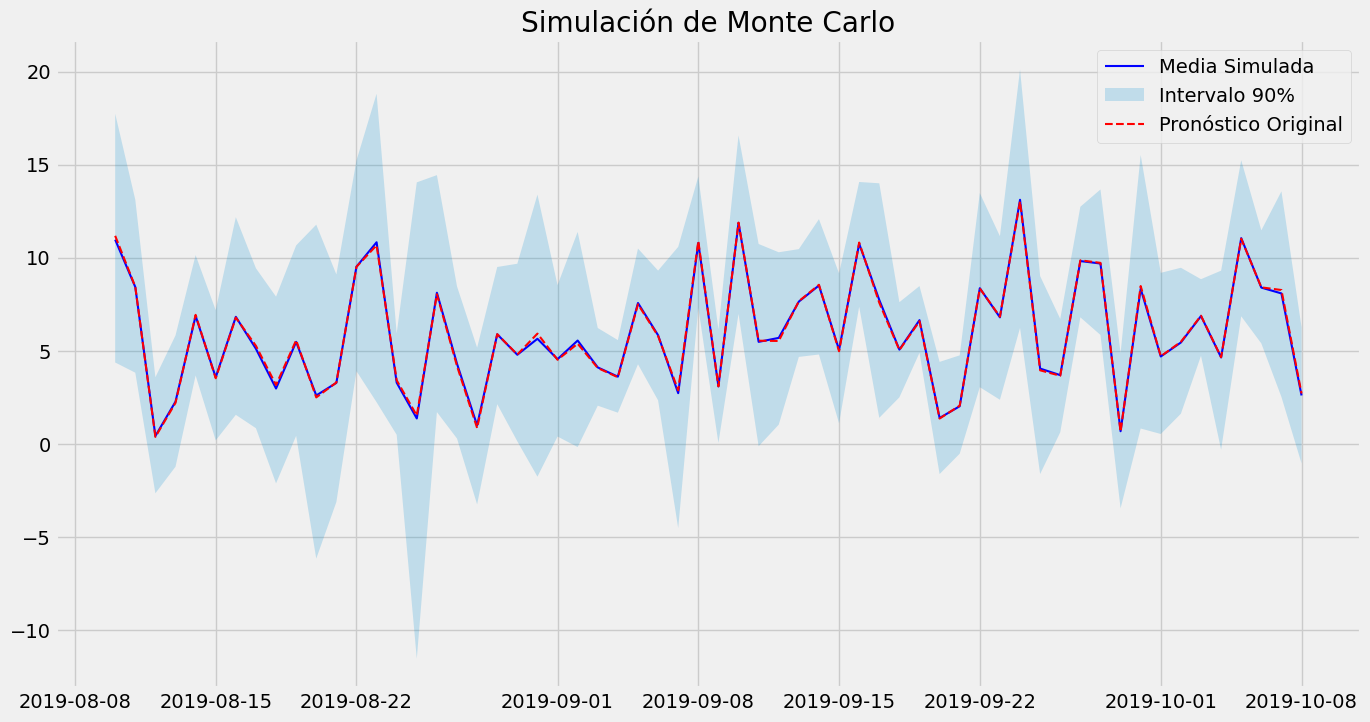

In [67]:
# Visualización
plt.figure(figsize=(15, 8))
plt.plot(resultados_df['mean'], 'b-', label = 'Media Simulada')
plt.fill_between(resultados_df.index, resultados_df['percentile_5'], resultados_df['percentile_95'], alpha = 0.2, label='Intervalo 90%')

plt.plot(df1.index , df1['Huber'], 'r--', label='Pronóstico Original')
plt.title('Simulación de Monte Carlo')
plt.legend()
plt.show()

## Escenario de analisis

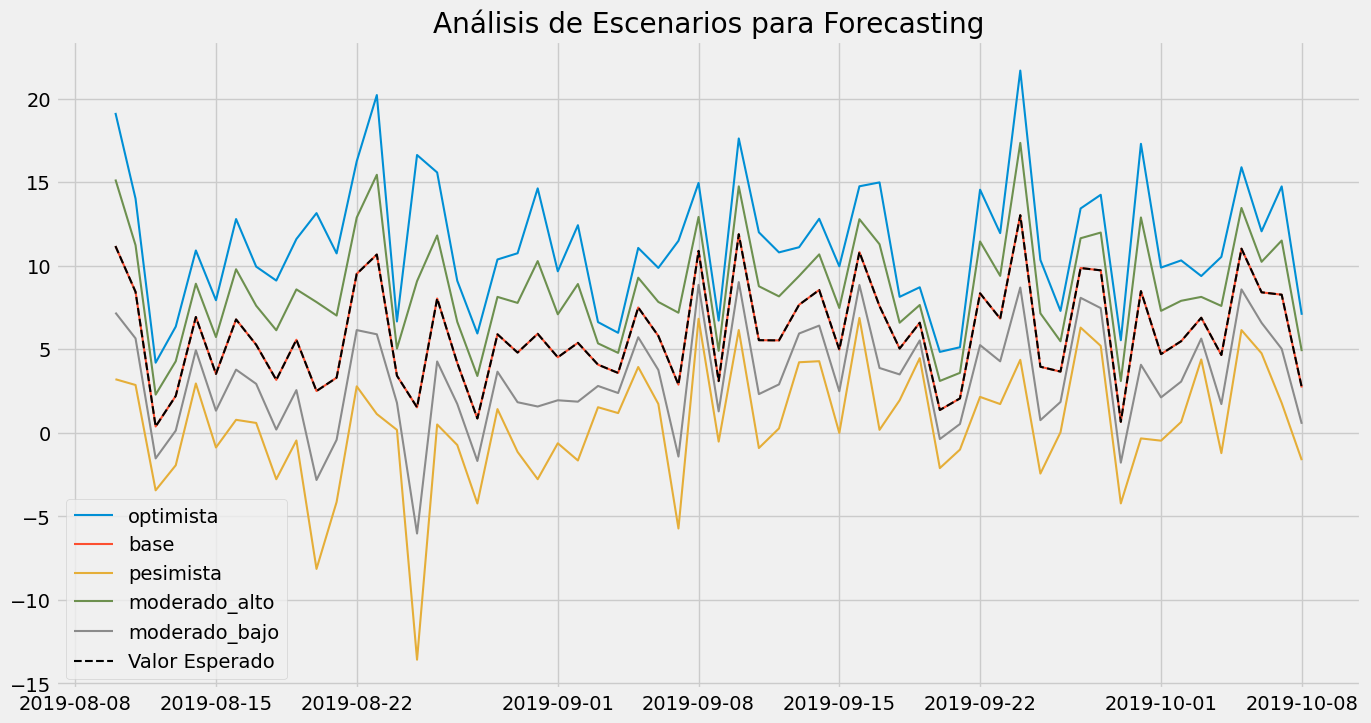

In [69]:
def scenario_analysis(df):
    """
    Realiza análisis de escenarios basado en los pronósticos
    """
    scenarios = pd.DataFrame({
        'optimista': df['Huber-hi-95'],
        'base': df['Huber'],
        'pesimista': df['Huber-lo-95'],
        'moderado_alto': df['Huber'] + (df['Huber-hi-95'] - df['Huber'])/2,
        'moderado_bajo': df['Huber'] - (df['Huber'] - df['Huber-lo-95'])/2
    })
    
    # Calcular probabilidades de cada escenario
    probabilities = {
        'optimista': 0.05,
        'moderado_alto': 0.20,
        'base': 0.50,
        'moderado_bajo': 0.20,
        'pesimista': 0.05
    }
    
    # Calcular valor esperado ponderado
    expected_value = sum(scenarios[scen] * prob 
                        for scen, prob in probabilities.items())
    
    return scenarios, expected_value

# Ejecutar análisis de escenarios
scenarios, expected_value = scenario_analysis(df1)

# Visualización
plt.figure(figsize=(15, 8))
for column in scenarios.columns:
    plt.plot(scenarios[column], label=column)
plt.plot(expected_value, 'k--', label='Valor Esperado')
plt.title('Análisis de Escenarios para Forecasting')
plt.legend()
plt.show()

## Análisis de Riesgo

In [70]:
np.array(simulaciones_df)

array([[8.316154862319383, 15.597693356528357, 9.473739107862592, ...,
        9.605842135160144, 14.510318672108767, 9.941398112595454],
       [4.920476390601792, 8.08936252942372, 6.647461612295253, ...,
        12.93188632362703, 11.500646514851322, 6.719082467813662],
       [0.651613420613997, 3.4118566588969093, 0.27565126289661696, ...,
        -0.1863861720467188, 0.8842081446413276, 1.0880231861370993],
       ...,
       [9.311249300028166, 6.30111487622544, 11.371151488408819, ...,
        7.900182528800151, 7.82525868175627, 9.505729364729367],
       [7.6088400223581125, 8.196959789493318, 11.129760377815355, ...,
        12.14535195280989, 9.317754682014133, 12.507104299543876],
       [0.9850684711311681, 3.694826423545068, 2.3941865024636617, ...,
        1.2037951981976096, 3.942844567204995, 0.9513318384206984]],
      dtype=object)

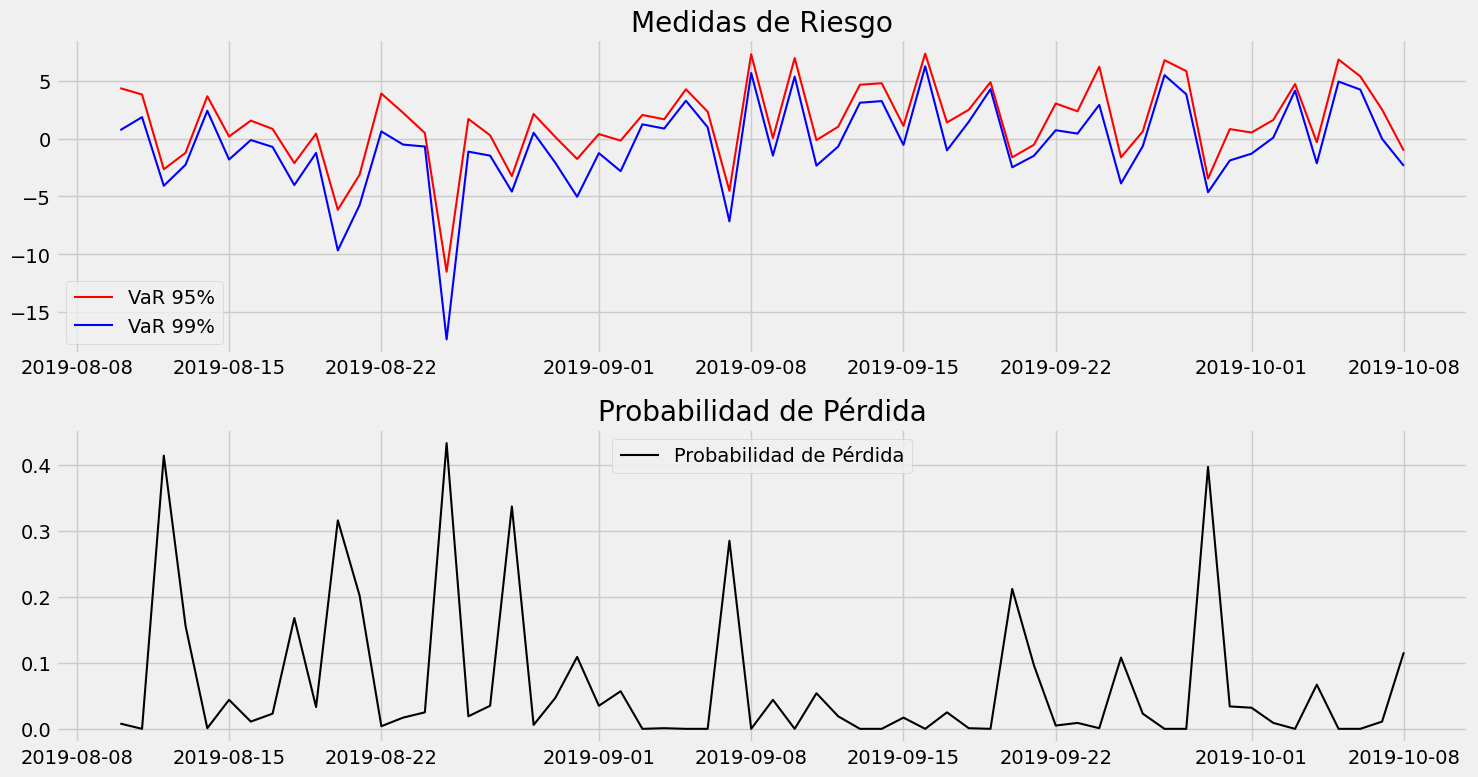

In [71]:
def risk_analysis(df, simulations):
    """
    Realiza análisis de riesgo basado en simulaciones
    """
    risk_metrics = {
        # Value at Risk (VaR)
        'VaR_95': np.percentile(simulaciones_df, 5, axis=1),
        'VaR_99': np.percentile(simulaciones_df, 1, axis=1),
        
        # Expected Shortfall (ES)
        'ES_95': np.mean(simulaciones_df[simulaciones_df <= np.percentile(simulaciones_df, 5)]),
        'ES_99': np.mean(simulaciones_df[simulaciones_df <= np.percentile(simulaciones_df, 1)]),
        
        # Volatilidad
        'volatility': np.std(simulaciones_df, axis=1),
        
        # Ratio de Sharpe (asumiendo tasa libre de riesgo = 0)
        'sharpe_ratio': np.mean(simulaciones_df, axis=1) / np.std(simulaciones_df, axis=1)
    }
    
    # Calcular probabilidad de pérdida
    prob_loss = np.mean(simulaciones_df < 0, axis=1)
    
    return pd.DataFrame(risk_metrics, index=df.index), prob_loss

# Ejecutar análisis de riesgo
risk_metrics, prob_loss = risk_analysis(df1, simulaciones_df)

# Visualización
plt.figure(figsize=(15, 8))
plt.subplot(2,1,1)
plt.plot(risk_metrics['VaR_95'], 'r-', label='VaR 95%')
plt.plot(risk_metrics['VaR_99'], 'b-', label='VaR 99%')
plt.title('Medidas de Riesgo')
plt.legend()

plt.subplot(2,1,2)
plt.plot(prob_loss, 'k-', label='Probabilidad de Pérdida')
plt.title('Probabilidad de Pérdida')
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
risk_metrics.head()

VaR_95    VaR_99     ES_95     ES_99 volatility sharpe_ratio
ds                                                                        
2019-08-10  4.375924  0.740446 -2.802513 -6.807479   4.120935     2.662364
2019-08-11  3.827517  1.866491 -2.802513 -6.807479   2.845882     2.961787
2019-08-12 -2.648362 -4.077958 -2.802513 -6.807479   1.935239     0.221945
2019-08-13 -1.221436 -2.256292 -2.802513 -6.807479   2.168866      1.04799
2019-08-14   3.67834  2.418291 -2.802513 -6.807479   2.022616     3.399025

## Análisis de Sensibilidad

In [86]:
df1.head()

ds      Huber  Huber-lo-95  Huber-hi-95       mean   std_dev
0 2019-08-10  11.178494     3.208289    19.148700  11.178494  4.066432
1 2019-08-11   8.440011     2.862545    14.017478   8.440011  2.845646
2 2019-08-12   0.378267    -3.441558     4.198091   0.378267  1.948890
3 2019-08-13   2.208612    -1.941480     6.358704   2.208612  2.117394
4 2019-08-14   6.933536     2.953226    10.913847   6.933536  2.030771

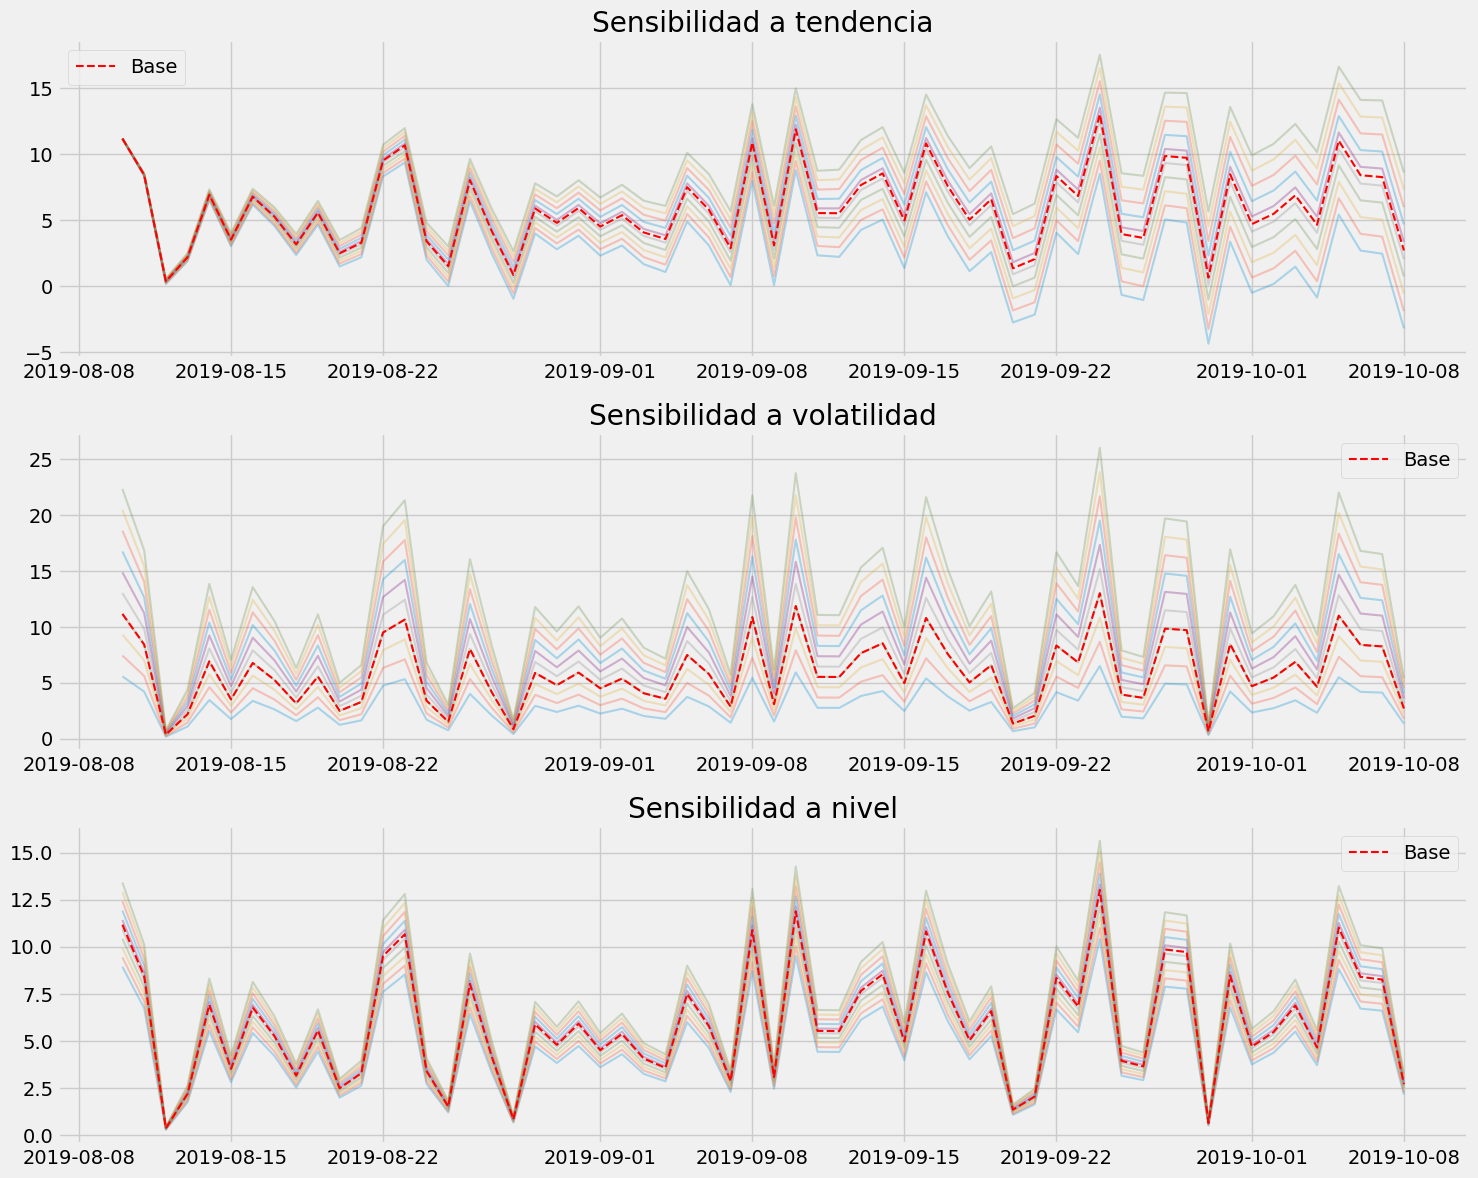

In [88]:
def sensitivity_analysis(df, param_ranges):
    """
    Realiza análisis de sensibilidad variando parámetros clave
    """
    # Definir parámetros a variar
    parameters = {
        'tendencia': np.linspace(-0.1, 0.1, 10),
        'volatilidad': np.linspace(0.5, 2, 10),
        'nivel': np.linspace(0.8, 1.2, 10)
    }
    
    sensitivity_results = {}
    base_forecast = df['Huber'].values
    
    for param, values in parameters.items():
        results = []
        for value in values:
            if param == 'tendencia':
                modified_forecast = base_forecast + value * np.arange(len(base_forecast))
            elif param == 'volatilidad':
                modified_forecast = base_forecast * value
            else:  # nivel
                modified_forecast = base_forecast * value
            
            results.append(modified_forecast)
        
        sensitivity_results[param] = np.array(results)
    
    return sensitivity_results

# Ejecutar análisis de sensibilidad
param_ranges = {
    'tendencia': (-0.1, 0.1),
    'volatilidad': (0.5, 2),
    'nivel': (0.8, 1.2)
}
sensitivity_results = sensitivity_analysis(df1, param_ranges)

# Visualización
plt.figure(figsize=(15, 12))
for i, (param, results) in enumerate(sensitivity_results.items(), 1):
    plt.subplot(3,1,i)
    for j in range(results.shape[0]):
        plt.plot(df1["ds"],results[j], alpha=0.3)
    plt.plot(df1["ds"], df1['Huber'], 'r--', label='Base')
    plt.title(f'Sensibilidad a {param}')
    plt.legend()
plt.tight_layout()
plt.show()

In [76]:
df1.reset_index(inplace = True)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def analisis_sensibilidad_ventas(df):
    """
    Realiza análisis de sensibilidad con diferentes porcentajes de caída en ventas
    """
    # Definir porcentajes de caída
    porcentajes_caida = [0, 5, 10, 15, 20]
    
    # Crear DataFrame para almacenar escenarios
    scenarios = pd.DataFrame()
    scenarios['fecha'] = df['ds']
    
    # Calcular escenarios
    for porcentaje in porcentajes_caida:
        factor = 1 - (porcentaje/100)
        col_name = f'Caída_{porcentaje}%'
        scenarios[col_name] = df['Huber'] * factor
        
    # Calcular métricas estadísticas
    stats = {
        'Media': scenarios.iloc[:, 1:].mean(),
        'Mediana': scenarios.iloc[:, 1:].median(),
        'Desv_Est': scenarios.iloc[:, 1:].std(),
        'Min': scenarios.iloc[:, 1:].min(),
        'Max': scenarios.iloc[:, 1:].max(),
        'Total_Ventas': scenarios.iloc[:, 1:].sum()
    }
    
    # Calcular impacto relativo
    impacto = pd.DataFrame({
        'Escenario': scenarios.columns[1:],
        'Reducción_Total': (stats['Total_Ventas'] - stats['Total_Ventas'].max()) / stats['Total_Ventas'].max() * 100
    })
    
    return scenarios, pd.DataFrame(stats), impacto

# Ejecutar análisis
scenarios, stats, impacto = analisis_sensibilidad_ventas(df1)

In [78]:
scenarios.head()

fecha   Caída_0%   Caída_5%  Caída_10%  Caída_15%  Caída_20%
0 2019-08-10  11.178494  10.619570  10.060645   9.501720   8.942796
1 2019-08-11   8.440011   8.018011   7.596010   7.174010   6.752009
2 2019-08-12   0.378267   0.359353   0.340440   0.321527   0.302613
3 2019-08-13   2.208612   2.098181   1.987751   1.877320   1.766890
4 2019-08-14   6.933536   6.586860   6.240183   5.893506   5.546829


Estadísticas por Escenario:
           Media  Mediana  Desv_Est   Min    Max  Total_Ventas
Caída_0%    5.94     5.54      3.07  0.38  13.02        356.16
Caída_5%    5.64     5.26      2.92  0.36  12.37        338.36
Caída_10%   5.34     4.98      2.76  0.34  11.72        320.55
Caída_15%   5.05     4.71      2.61  0.32  11.07        302.74
Caída_20%   4.75     4.43      2.46  0.30  10.42        284.93

Impacto Total por Escenario:
           Escenario  Reducción_Total
Caída_0%    Caída_0%              0.0
Caída_5%    Caída_5%             -5.0
Caída_10%  Caída_10%            -10.0
Caída_15%  Caída_15%            -15.0
Caída_20%  Caída_20%            -20.0


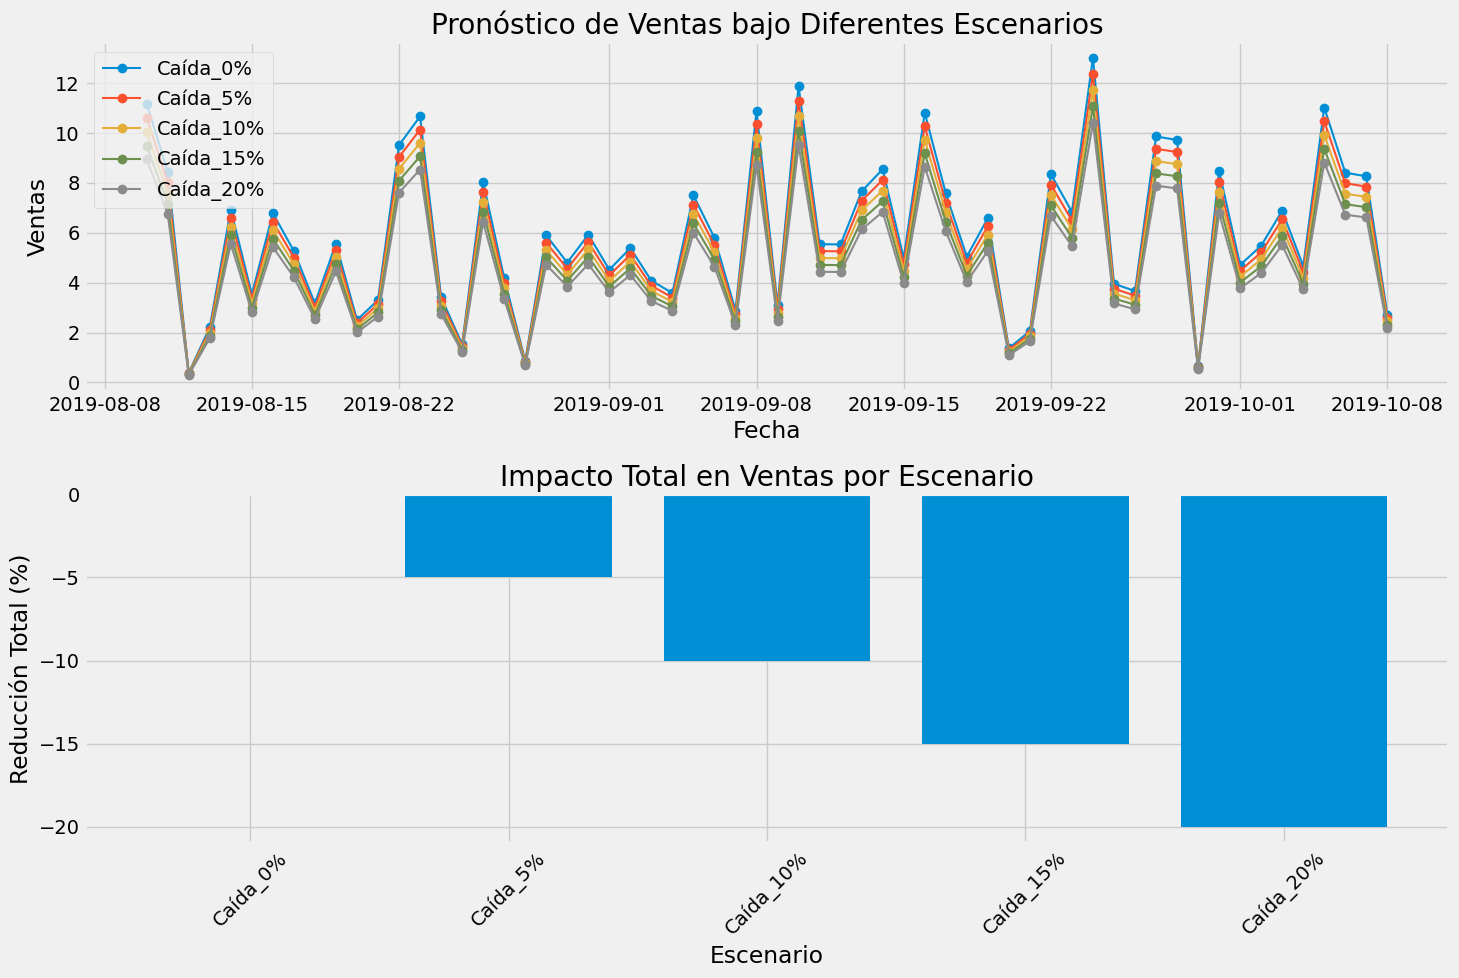

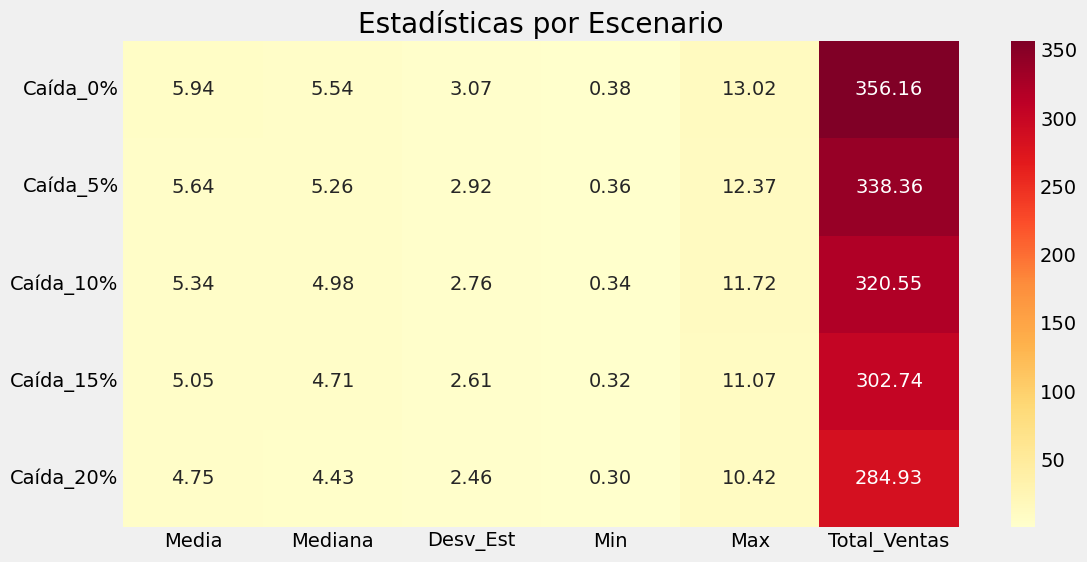

In [79]:
# Visualizaciones
def plot_sensitivity_analysis(scenarios, stats, impacto):
    # 1. Gráfico de líneas para todos los escenarios
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Pronósticos por escenario
    plt.subplot(2, 1, 1)
    for col in scenarios.columns[1:]:
        plt.plot(scenarios['fecha'], scenarios[col], label=col, marker='o')
    plt.title('Pronóstico de Ventas bajo Diferentes Escenarios')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    
    # Subplot 2: Impacto total por escenario
    plt.subplot(2, 1, 2)
    plt.bar(impacto['Escenario'], impacto['Reducción_Total'])
    plt.title('Impacto Total en Ventas por Escenario')
    plt.xlabel('Escenario')
    plt.ylabel('Reducción Total (%)')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Heatmap de estadísticas
    plt.figure(figsize=(12, 6))
    sns.heatmap(stats.round(2), annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title('Estadísticas por Escenario')
    plt.show()

# Mostrar resultados
print("\nEstadísticas por Escenario:")
print(stats.round(2))
print("\nImpacto Total por Escenario:")
print(impacto.round(2))

# Generar visualizaciones
plot_sensitivity_analysis(scenarios, stats, impacto)

In [80]:
# Análisis adicional: Calcular elasticidad de la caída
def calcular_elasticidad(impacto):
    """
    Calcula la elasticidad del impacto por cada punto porcentual de caída
    """
    elasticidad = []
    for i in range(1, len(impacto)):
        cambio_impacto = impacto['Reducción_Total'].iloc[i] - impacto['Reducción_Total'].iloc[i-1]
        cambio_porcentaje = 5  # diferencia entre escenarios
        elasticidad.append(cambio_impacto / cambio_porcentaje)
    
    # Ajustar la longitud de 'Intervalo' para que coincida con 'elasticidad'
    intervalos = [f'De {i}% a {i+5}%' for i in range(0, 20, 5)][:len(elasticidad)]
    
    return pd.DataFrame({
        'Intervalo': intervalos,
        'Elasticidad': elasticidad
    })

elasticidad = calcular_elasticidad(impacto)
print("\nElasticidad del Impacto:")
print(elasticidad.round(3))



Elasticidad del Impacto:
      Intervalo  Elasticidad
0    De 0% a 5%         -1.0
1   De 5% a 10%         -1.0
2  De 10% a 15%         -1.0
3  De 15% a 20%         -1.0


In [81]:
# Resumen ejecutivo
print("\nRESUMEN EJECUTIVO DEL ANÁLISIS DE SENSIBILIDAD:")
print("-" * 50)
print(f"1. El escenario base tiene un total de ventas de {stats['Total_Ventas']['Caída_0%']:.2f} unidades")
print(f"2. Una caída del 20% en ventas resultaría en una reducción total de {abs(impacto['Reducción_Total'].iloc[-1]):.2f}%")
print(f"3. La mayor elasticidad se observa en el intervalo {elasticidad.loc[elasticidad['Elasticidad'].abs().idxmax(), 'Intervalo']}")
print(f"4. La variabilidad (desviación estándar) aumenta de {stats['Desv_Est']['Caída_0%']:.2f} a {stats['Desv_Est']['Caída_20%']:.2f}")
print("-" * 50)

# Análisis de riesgo adicional
def analisis_riesgo(scenarios):
    """
    Calcula métricas de riesgo adicionales
    """
    riesgo = pd.DataFrame()
    base = scenarios['Caída_0%']
    
    for col in scenarios.columns[1:]:
        if col != 'fecha':
            # Calcular métricas de riesgo
            diff = scenarios[col] - base
            riesgo[col] = [
                np.mean(diff),  # Impacto promedio
                np.std(diff),   # Volatilidad del impacto
                np.percentile(diff, 5),  # VaR 95%
                len(diff[diff < 0]) / len(diff) * 100  # Probabilidad de pérdida
            ]
    
    riesgo.index = ['Impacto_Promedio', 'Volatilidad', 'VaR_95', 'Prob_Pérdida']
    return riesgo

riesgo = analisis_riesgo(scenarios)
print("\nANÁLISIS DE RIESGO:")
print(riesgo.round(3))


RESUMEN EJECUTIVO DEL ANÁLISIS DE SENSIBILIDAD:
--------------------------------------------------
1. El escenario base tiene un total de ventas de 356.16 unidades
2. Una caída del 20% en ventas resultaría en una reducción total de 20.00%
3. La mayor elasticidad se observa en el intervalo De 0% a 5%
4. La variabilidad (desviación estándar) aumenta de 3.07 a 2.46
--------------------------------------------------

ANÁLISIS DE RIESGO:
                  Caída_0%  Caída_5%  Caída_10%  Caída_15%  Caída_20%
Impacto_Promedio       0.0    -0.297     -0.594     -0.890     -1.187
Volatilidad            0.0     0.152      0.305      0.457      0.609
VaR_95                 0.0    -0.551     -1.103     -1.654     -2.206
Prob_Pérdida           0.0   100.000    100.000    100.000    100.000



Estadísticas por Escenario:
      Caída_0%  Caída_5%  Caída_10%  Caída_15%  Caída_20%
mean     5.936     5.639      5.342      5.046      4.749
std      3.071     2.918      2.764      2.611      2.457
min      0.378     0.359      0.340      0.322      0.303
max     13.024    12.373     11.722     11.071     10.419
sum    356.164   338.356    320.548    302.740    284.932

Resumen del Impacto:
Caída_5%: Reducción del 5.0% en ventas totales
Caída_10%: Reducción del 10.0% en ventas totales
Caída_15%: Reducción del 15.0% en ventas totales
Caída_20%: Reducción del 20.0% en ventas totales


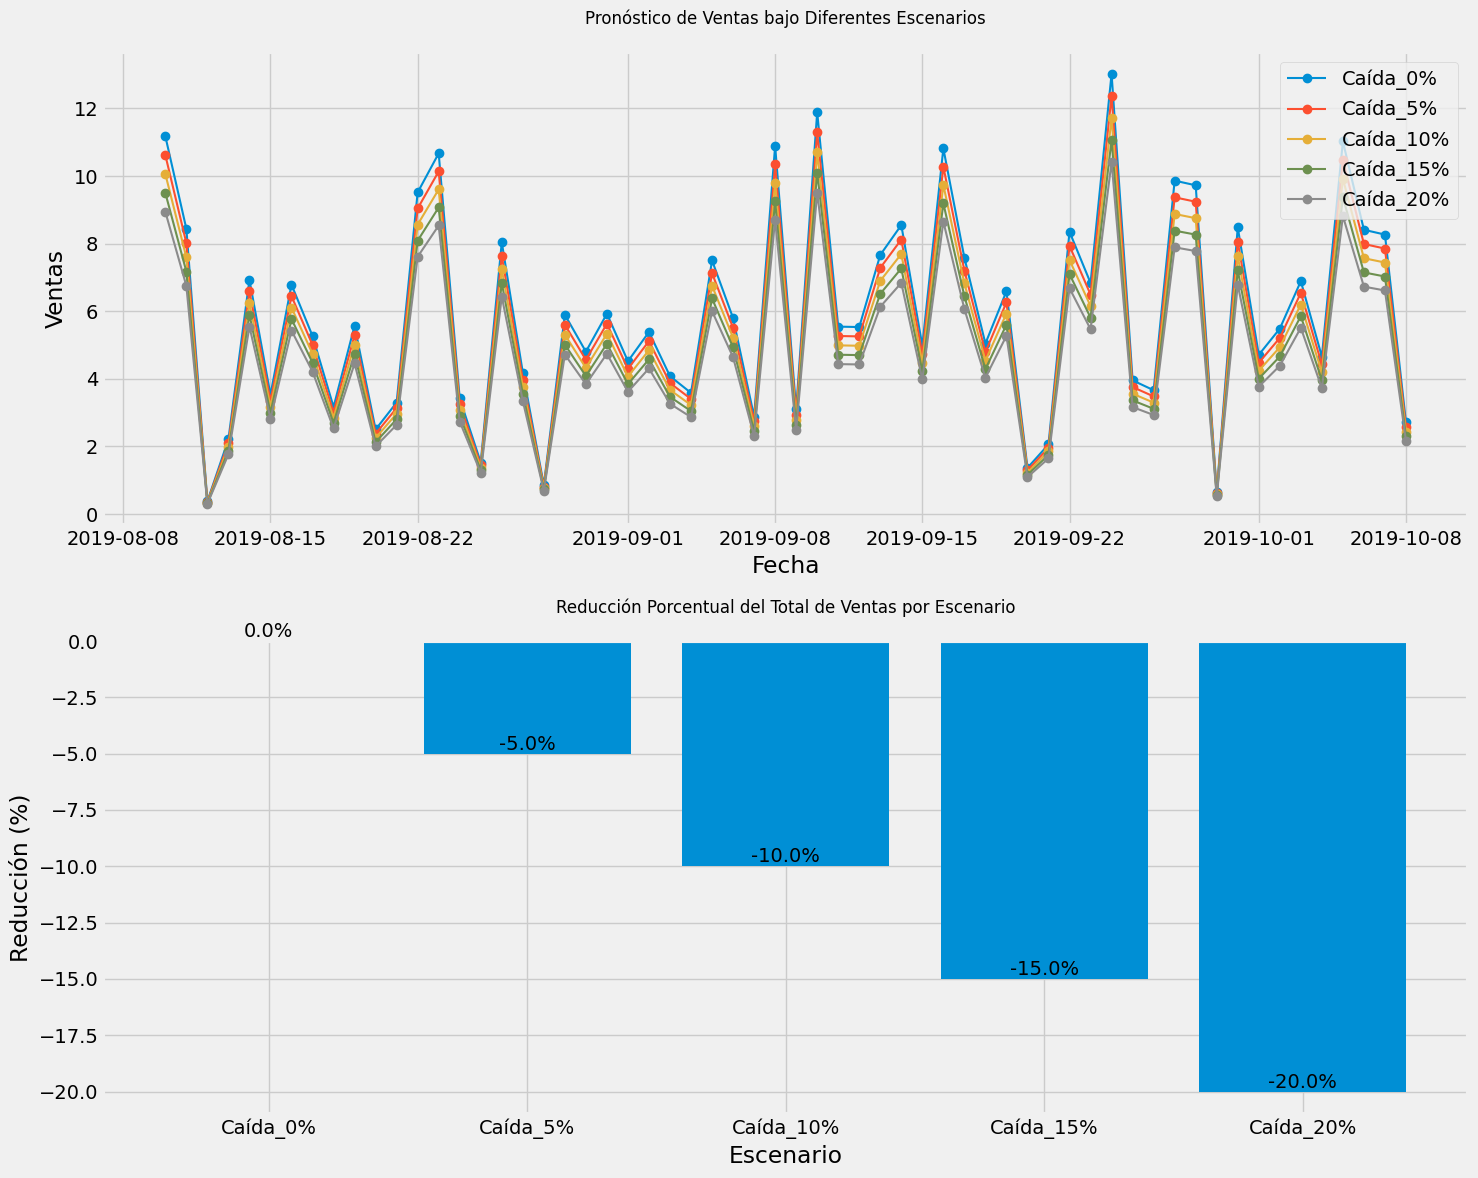

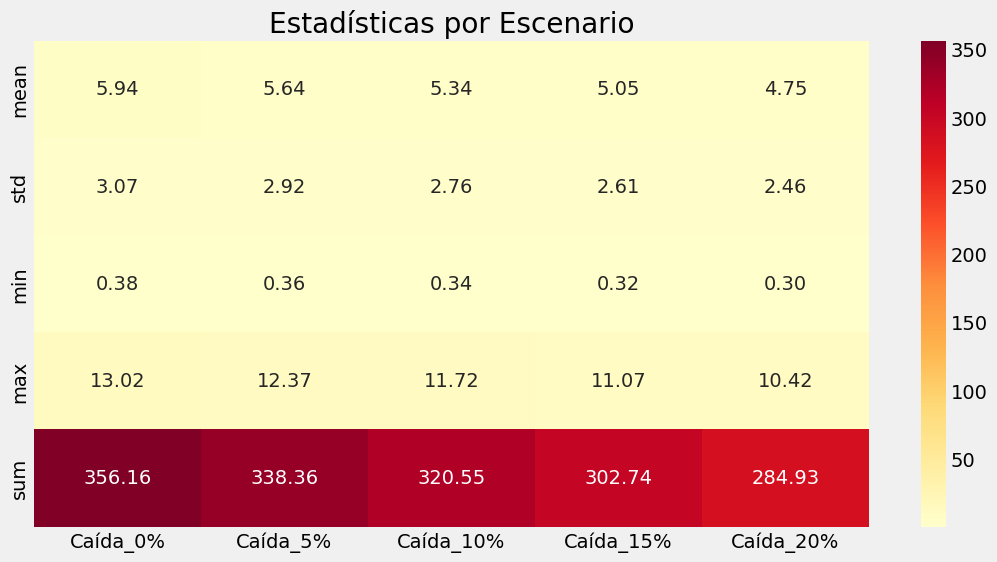


Análisis de Variabilidad:
Caída_0%: Coeficiente de variación = 51.74%
Caída_5%: Coeficiente de variación = 51.74%
Caída_10%: Coeficiente de variación = 51.74%
Caída_15%: Coeficiente de variación = 51.74%
Caída_20%: Coeficiente de variación = 51.74%


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Función para análisis de sensibilidad
def analisis_sensibilidad(df, porcentajes_caida=[0, 5, 10, 15, 20]):
    """
    Realiza análisis de sensibilidad con diferentes porcentajes de caída
    """
    # Crear DataFrame base
    resultados = pd.DataFrame()
    resultados['Fecha'] = df['ds']
    
    # Calcular escenarios
    for porcentaje in porcentajes_caida:
        factor = 1 - (porcentaje/100)
        resultados[f'Caída_{porcentaje}%'] = df['Huber'] * factor
    
    return resultados

# Función para calcular estadísticas
def calcular_estadisticas(df_sensibilidad):
    """
    Calcula estadísticas descriptivas para cada escenario
    """
    stats = df_sensibilidad.drop('Fecha', axis=1).agg([
        'mean',
        'std',
        'min',
        'max',
        'sum'
    ]).round(3)
    
    return stats

# Función para visualización
def visualizar_sensibilidad(df_sensibilidad, stats):
    # Configurar el estilo
    #plt.style.use('seaborn')
    
    # Crear figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Gráfico de líneas - Pronósticos
    for column in df_sensibilidad.columns:
        if column != 'Fecha':
            ax1.plot(df_sensibilidad['Fecha'], 
                    df_sensibilidad[column], 
                    marker='o', 
                    label=column)
    
    ax1.set_title('Pronóstico de Ventas bajo Diferentes Escenarios', 
                  fontsize=12, pad=20)
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Ventas')
    ax1.legend()
    ax1.grid(True)
    
    # Gráfico de barras - Totales
    totales = stats.loc['sum']
    reduccion = ((totales - totales.iloc[0]) / totales.iloc[0] * 100).round(2)
    
    ax2.bar(totales.index, reduccion)
    ax2.set_title('Reducción Porcentual del Total de Ventas por Escenario', 
                  fontsize=12, pad=20)
    ax2.set_xlabel('Escenario')
    ax2.set_ylabel('Reducción (%)')
    
    # Añadir etiquetas de valor
    for i, v in enumerate(reduccion):
        ax2.text(i, v, f'{v}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Heatmap de estadísticas
    plt.figure(figsize=(12, 6))
    sns.heatmap(stats, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title('Estadísticas por Escenario')
    plt.show()

# Ejecutar análisis
df_sensibilidad = analisis_sensibilidad(df1)
stats = calcular_estadisticas(df_sensibilidad)

# Mostrar resultados
print("\nEstadísticas por Escenario:")
print(stats)

print("\nResumen del Impacto:")
base_total = stats.loc['sum', 'Caída_0%']
for columna in stats.columns:
    if columna != 'Caída_0%':
        reduccion = ((stats.loc['sum', columna] - base_total) / base_total * 100).round(2)
        print(f"{columna}: Reducción del {abs(reduccion)}% en ventas totales")

# Visualizar resultados
visualizar_sensibilidad(df_sensibilidad, stats)

# Análisis adicional de variabilidad
print("\nAnálisis de Variabilidad:")
for columna in df_sensibilidad.columns:
    if columna != 'Fecha':
        cv = (df_sensibilidad[columna].std() / df_sensibilidad[columna].mean() * 100).round(2)
        print(f"{columna}: Coeficiente de variación = {cv}%")

# `Estimadores que manejan valores de NaN`

Si eres experto en `Data Sciences` entonces debes de conocer que existen 

algunos estimadores que están diseñados para manejar valores `NaN` sin preprocesamiento.

#### `Estimadores que permiten valores NaN para el tipo de clúster:`
- HDBSCAN

#### `Estimadores que permiten valores NaN para el tipo regresor:`
1. BaggingRegressor
2. DecisionTreeRegressor
3. ExtraTreeRegressor
4. ExtraTreesRegressor
5. HistGradientBoostingRegressor
6. RandomForestRegressor
7. StackingRegressor
8. VotingRegressor